For Text Mining assignment
 
 ONE:
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)


### Import necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install -U spacy

Note: you may need to restart the kernel to use updated packages.


In [3]:
!python -m spacy download en_core_web_md

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


2022-10-16 13:35:56.441815: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-10-16 13:35:56.442203: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-16 13:36:08.731728: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-10-16 13:36:08.731786: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-16 13:36:08.738092: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Prajnya
2022-10-16 13:36:08.738230: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Prajnya


In [4]:
!pip install wordcloud

In [5]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import string
import spacy

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
nlp = spacy.load('en_core_web_md')

In [8]:
!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

2022-10-16 13:37:08.595915: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-10-16 13:37:08.596005: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-16 13:37:16.487757: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-10-16 13:37:16.487820: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-16 13:37:16.495167: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Prajnya
2022-10-16 13:37:16.495328: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Prajnya


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


### Import data

In [9]:
tweet = pd.read_csv("D:\\Downloads\\Prajnya\\Assignments\\11.Text mining\\Elon_musk.csv",encoding='latin1')
tweet

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [10]:
len(tweet)

1999

In [11]:
tweet.drop('Unnamed: 0',axis=1,inplace=True)
tweet.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [12]:
tweet=[Text.strip() for Text in tweet.Text] # remove both the leading and the trailing characters
tweet=[Text for Text in tweet if Text] # removes empty strings, because they are considered in Python as False
tweet[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [13]:
# Joining the list into one string/text
tweet_text = ' '.join(tweet)
tweet_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [14]:
#Punctuation
no_punc_text = tweet_text.translate(str.maketrans('', '', string.punctuation)) 
#with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x' are replaced by characters in 'y'. 
#'z' is a string (string.punctuation here)
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prajn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['kunalb11', 'I\x92m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo']


In [17]:
len(text_tokens)

21078

In [18]:
#Normalize the data
lower_words = [x.lower() for x in text_tokens]
print(lower_words[0:25])

['kunalb11', 'i\x92m', 'an', 'alien', 'idaacarmack', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'nextlevel', 'have', 'you', 'tried', 'it', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'is', 'underestimated']


In [19]:
#Remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prajn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
my_stop_words = stopwords.words('english')
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
my_stop_words.append('the')
no_stop_tokens = [word for word in lower_words if not word in my_stop_words]
print(no_stop_tokens[0:40])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy']


In [22]:
len(no_stop_tokens)

14882

In [23]:
len(lower_words)

21078

In [24]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [25]:
stemmed_tokens = [ps.stem(word) for word in no_stop_tokens]
print(stemmed_tokens[0:40])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'thought', 'would', 'fail', 'httpstcozgxjfdzzrm', 'owenspark', 'flcnhvi']


In [26]:
for w in no_stop_tokens:
    print(w, " : ", ps.stem(w))

kunalb11  :  kunalb11
im  :  im
alien  :  alien
idaacarmack  :  idaacarmack
ray  :  ray
tracing  :  trace
cyberpunk  :  cyberpunk
hdr  :  hdr
nextlevel  :  nextlevel
tried  :  tri
joerogan  :  joerogan
spotify  :  spotifi
great  :  great
interview  :  interview
gtera27  :  gtera27
doge  :  doge
underestimated  :  underestim
teslacn  :  teslacn
congratulations  :  congratul
tesla  :  tesla
china  :  china
amazing  :  amaz
execution  :  execut
last  :  last
year  :  year
next  :  next
even  :  even
happy  :  happi
new  :  new
year  :  year
ox  :  ox
httpstco9wfkmyu2oj  :  httpstco9wfkmyu2oj
frodo  :  frodo
underdoge  :  underdog
thought  :  thought
would  :  would
fail  :  fail
httpstcozgxjfdzzrm  :  httpstcozgxjfdzzrm
owensparks  :  owenspark
flcnhvy  :  flcnhvi
anonyx10  :  anonyx10
haha  :  haha
thanks  :  thank
flcnhvy  :  flcnhvi
anonyx10  :  anonyx10
indeed  :  inde
tweets  :  tweet
definitely  :  definit
represent  :  repres
realworld  :  realworld
time  :  time
allocation  :  a

falcon  :  falcon
9  :  9
launches  :  launch
60  :  60
starlink  :  starlink
satellites  :  satellit
orbit  :  orbit
  :  
mission  :  mission
pad  :  pad
39a  :  39a
deck  :  deck
httpstco71cucbgpnx  :  httpstco71cucbgpnx
mikko  :  mikko
darudevil  :  darudevil
its  :  it
true  :  true
joshbickett  :  joshbickett
ajtourville  :  ajtourvil
erdayastronaut  :  erdayastronaut
spacex  :  spacex
yeah  :  yeah
default  :  default
engine  :  engin
least  :  least
lever  :  lever
arm  :  arm
would  :  would
shut  :  shut
3  :  3
good  :  good
ajtourville  :  ajtourvil
erdayastronaut  :  erdayastronaut
spacex  :  spacex
yes  :  ye
engines  :  engin
min  :  min
throttle  :  throttl
point  :  point
flameout  :  flameout
risk  :  risk
la  :  la
httpstcothniyssnwn  :  httpstcothniyssnwn
adamklotz  :  adamklotz
erdayastronaut  :  erdayastronaut
spacex  :  spacex
yes  :  ye
erdayastronaut  :  erdayastronaut
spacex  :  spacex
foolish  :  foolish
us  :  us
start  :  start
3  :  3
engines  :  engin

division  :  divis
fundamentally  :  fundament
broken  :  broken
reg  :  reg
httpstcosi63axbjbz  :  httpstcosi63axbjbz
evankaylor  :  evankaylor
nomad  :  nomad
anbuteau  :  anbuteau
u0001f917  :  u0001f917
esthetics  :  esthet
cyberpunk  :  cyberpunk
incredible  :  incred
btw  :  btw
interior  :  interior
design  :  design
isu0001f44c  :  isu0001f44c
trevormahlmann  :  trevormahlmann
spacex  :  spacex
major  :  major
esthetics  :  esthet
improvements  :  improv
coming  :  come
teslaownerssv  :  teslaownerssv
dmcryan  :  dmcryan
little  :  littl
dmcryan  :  dmcryan
new  :  new
roadster  :  roadster
part  :  part
rocket  :  rocket
dmcryan  :  dmcryan
lafebra  :  lafebra
gfilche  :  gfilch
theres  :  there
storage  :  storag
amp  :  amp
easily  :  easili
upgradable  :  upgrad
avalonpenrose  :  avalonpenros
httpstcodjdzxq4maz  :  httpstcodjdzxq4maz
couchinvestor  :  couchinvestor
yes  :  ye
247teslanews  :  247teslanew
wholemarsblog  :  wholemarsblog
yeah  :  yeah
probably  :  probabl
m

fullsize  :  fullsiz
car  :  car
httpstcochgqmaiyts  :  httpstcochgqmaiyt
lexfridman  :  lexfridman
tegmark  :  tegmark
tegmark  :  tegmark
exceptionally  :  except
smart  :  smart
amp  :  amp
good  :  good
human  :  human
owensparks  :  owenspark
best  :  best
manufacturing  :  manufactur
technology  :  technolog
ultra  :  ultra
high  :  high
volume  :  volum
industries  :  industri
like  :  like
food  :  food
amp  :  amp
beverage  :  beverag
medical  :  medic
eg  :  eg
syringes  :  syring
amp  :  amp
toys  :  toy
battery  :  batteri
cell  :  cell
production  :  product
fundamental  :  fundament
ratelimiter  :  ratelimit
slowing  :  slow
sustainable  :  sustain
energy  :  energi
future  :  futur
important  :  import
pr  :  pr
httpstco9ybabezxcv  :  httpstco9ybabezxcv
pferragu  :  pferragu
looking  :  look
question  :  question
fsd  :  fsd
viewed  :  view
reasonably  :  reason
valuable  :  valuabl
tradein  :  tradein
tobyliiiiiiiiii  :  tobyliiiiiiiiii
erdayastronaut  :  erdayastronaut

spacex  :  spacex
sean18743005  :  sean18743005
erdayastronaut  :  erdayastronaut
spacex  :  spacex
catapult  :  catapult
high  :  high
air  :  air
amp  :  amp
land  :  land
roof  :  roof
base  :  base
jumping  :  jump
parachute  :  parachut
way  :  way
travel  :  travel
erdayastronaut  :  erdayastronaut
spacex  :  spacex
thats  :  that
actually  :  actual
restaurant  :  restaur
spacex  :  spacex
building  :  build
futuristic  :  futurist
bar  :  bar
top  :  top
h  :  h
httpstcoz2umtgsaoi  :  httpstcoz2umtgsaoi
techreview  :  techreview
increase  :  increas
fun  :  fun
hopefully  :  hope
benmezrich  :  benmezrich
neither  :  neither
tonychomrmagic  :  tonychomrmag
teslaenergy  :  teslaenergi
one  :  one
best  :  best
tesla  :  tesla
solar  :  solar
roof  :  roof
installations  :  instal
91demigod  :  91demigod
maybe  :  mayb
one  :  one
day  :  day
ppathole  :  ppathol
engineersfeed  :  engineersfe
yes  :  ye
would  :  would
best  :  best
way  :  way
large  :  larg
solar  :  solar
fi

love  :  love
us  :  us
were  :  wer
deep  :  deep
trouble  :  troubl
everything  :  everyth
made  :  made
cake  :  cake
httpstcoomacmyqawx  :  httpstcoomacmyqawx
chicagoglenn  :  chicagoglenn
true  :  true
haha  :  haha
weird  :  weird
game  :  game
think  :  think
httpstco5mrvvzmekg  :  httpstco5mrvvzmekg
cgi  :  cgi
httpstcovoive97vpr  :  httpstcovoive97vpr
bensullins  :  bensullin
need  :  need
ui  :  ui
overhaul  :  overhaul
maldivawow  :  maldivawow
codingmark  :  codingmark
tesla  :  tesla
incremental  :  increment
improvements  :  improv
production  :  product
codebase  :  codebas
fsd  :  fsd
build  :  build
httpstco07puoramgo  :  httpstco07puoramgo
spacenewsinc  :  spacenewsinc
starlink  :  starlink
poses  :  pose
hazard  :  hazard
viasats  :  viasat
profits  :  profit
like  :  like
stop  :  stop
sneaky  :  sneaki
moves  :  move
charlie  :  charli
ergen  :  ergen
entertainment  :  entertain
critical  :  critic
cars  :  car
drive  :  drive
kimpaquette  :  kimpaquett
mee

money  :  money
hajekmiloslav  :  hajekmiloslav
great  :  great
nails  :  nail
amp  :  amp
lipstick  :  lipstick
mightytesla  :  mightytesla
kristennetten  :  kristennetten
laurenkalo  :  laurenkalo
sawyermerritt  :  sawyermerritt
jasondebolt  :  jasondebolt
codingmark  :  codingmark
28delayslater  :  28delayslat
babytesla3  :  babytesla3
httpstcodvwzgtppda  :  httpstcodvwzgtppda
httpstcoebojgshvrq  :  httpstcoebojgshvrq
callowaytech  :  callowaytech
sounds  :  sound
right  :  right
lord  :  lord
edge  :  edg
xdreamcoding  :  xdreamcod
frankthelen  :  frankthelen
nice  :  nice
branding  :  brand
kidding  :  kid
needs  :  need
safe  :  safe
word  :  word
anyway  :  anyway
bitcoin  :  bitcoin
safe  :  safe
word  :  word
rt  :  rt
spacex  :  spacex
falcon  :  falcon
9s  :  9
first  :  first
stage  :  stage
landed  :  land
landing  :  land
zone  :  zone
1  :  1
httpstcomr18qv3goc  :  httpstcomr18qv3goc
rt  :  rt
spacex  :  spacex
liftoff  :  liftoff
httpstcoag4rar6qnp  :  httpstcoag4

u2600ufe0f  :  u2600ufe0f
journey  :  journey
continues  :  continu
watch  :  watch
nasa  :  nasa
spacex  :  spacex
cargo  :  cargo
resupply  :  resuppli
mission  :  mission
docks  :  dock
spacestatio  :  spacestatio
nasaspaceflight  :  nasaspaceflight
knock  :  knock
knock  :  knock
singing  :  sing
telegram  :  telegram
lexfridman  :  lexfridman
carrying  :  carri
even  :  even
symbiotic  :  symbiot
bacteria  :  bacteria
40  :  40
trillion  :  trillion
cells  :  cell
adamklotz  :  adamklotz
lexfridman  :  lexfridman
yes  :  ye
lexfridman  :  lexfridman
mobile  :  mobil
cell  :  cell
colonies  :  coloni
100  :  100
rt  :  rt
spacex  :  spacex
tracking  :  track
footage  :  footag
helicopter  :  helicopt
todays  :  today
falcon  :  falcon
9  :  9
launch  :  launch
lc39a  :  lc39a
httpstco7ryvzrts18  :  httpstco7ryvzrts18
rt  :  rt
erdayastronaut  :  erdayastronaut
theres  :  there
something  :  someth
genuinely  :  genuin
magical  :  magic
seeing  :  see
starship  :  starship
sn8  

make  :  make
cargo  :  cargo
bay  :  bay
propel  :  propel
httpstcoj2uvultatv  :  httpstcoj2uvultatv
marcushousegame  :  marcushousegam
rapid  :  rapid
amp  :  amp
complete  :  complet
rocket  :  rocket
reuse  :  reus
low  :  low
cost  :  cost
propellant  :  propel
orbital  :  orbit
refilling  :  refil
amp  :  amp
propellant  :  propel
production  :  product
httpstcoumyur7yshy  :  httpstcoumyur7yshi
erdayastronaut  :  erdayastronaut
ppathole  :  ppathol
teslarati  :  teslarati
teslaroadtrip  :  teslaroadtrip
yes  :  ye
ppathole  :  ppathol
teslarati  :  teslarati
teslaroadtrip  :  teslaroadtrip
were  :  wer
still  :  still
far  :  far
simply  :  simpli
video  :  video
control  :  control
biggest  :  biggest
gamechanger  :  gamechang
cu  :  cu
httpstconb5hl7gzlx  :  httpstconb5hl7gzlx
teslarati  :  teslarati
teslaroadtrip  :  teslaroadtrip
fsd  :  fsd
beta  :  beta
5  :  5
coming  :  come
days  :  day
improvement  :  improv
significant  :  signific
xhnews  :  xhnew
exciting  :  excit

sort  :  sort
groundswell  :  groundswel
believed  :  believ
httpstcofwk1zihfeg  :  httpstcofwk1zihfeg
nullius  :  nulliu
verba  :  verba
royalsociety  :  royalsocieti
westcoastbill  :  westcoastbil
indeed  :  inde
reflexfunds  :  reflexfund
nickidk4  :  nickidk4
pcgamer  :  pcgamer
dojodoge  :  dojodog
ppathole  :  ppathol
erdayastronaut  :  erdayastronaut
rweb11742  :  rweb11742
yeah  :  yeah
looks  :  look
like  :  like
marginal  :  margin
cost  :  cost
launch  :  launch
less  :  less
1m  :  1m
1  :  1
httpstcornsj5fkdxt  :  httpstcornsj5fkdxt
speculawyer  :  speculawy
erdayastronaut  :  erdayastronaut
rweb11742  :  rweb11742
exactly  :  exactli
erdayastronaut  :  erdayastronaut
rweb11742  :  rweb11742
merlin  :  merlin
strong  :  strong
local  :  local
maximum  :  maximum
design  :  design
kerosene  :  kerosen
suboptimal  :  suboptim
fuel  :  fuel
matter  :  matter
httpstcojoetyskgp7  :  httpstcojoetyskgp7
parstalberg  :  parstalberg
joshbickett  :  joshbickett
icannotenough  :  ic

rt  :  rt
astrosoichi  :  astrosoichi
spacex  :  spacex
nasa  :  nasa
crew1  :  crew1
finished  :  finish
final  :  final
dress  :  dress
rehearsal  :  rehears
getting  :  get
ready  :  readi
saturday  :  saturday
launch  :  launch
behind  :  behind
real  :  real
dragon  :  dragon
mariolivio  :  mariolivio
kids  :  kid
though  :  though
mariolivio  :  mariolivio
hell  :  hell
wig  :  wig
collection  :  collect
michaelminalab  :  michaelminalab
would  :  would
great  :  great
labs  :  lab
could  :  could
give  :  give
people  :  peopl
level  :  level
granular  :  granular
feedback  :  feedback
results  :  result
rt  :  rt
michaelminalab  :  michaelminalab
elonmusk  :  elonmusk
great  :  great
question  :  question
its  :  it
complex  :  complex
question  :  question
depends  :  depend
test  :  test
used  :  use
ie  :  ie
want  :  want
kn  :  kn
worth  :  worth
reading  :  read
thread  :  thread
youre  :  your
curious  :  curiou
rona  :  rona
testing  :  test
httpstcofa6kd61eba  :  h

engineering  :  engin
students  :  student
httpstcokknyqlet0o  :  httpstcokknyqlet0o
4  :  4
astronauts  :  astronaut
fly  :  fli
spacestation  :  spacest
sat  :  sat
night  :  night
cape  :  cape
first  :  first
operational  :  oper
flight  :  flight
crew  :  crew
dragon  :  dragon
httpstcouzcgikcikb  :  httpstcouzcgikcikb
cardoso  :  cardoso
luck  :  luck
best  :  best
superpower  :  superpow
rt  :  rt
spacex  :  spacex
thank  :  thank
served  :  serv
sacrificed  :  sacrif
veteransday  :  veteransday
httpstcou8kn4fzpj9  :  httpstcou8kn4fzpj9
rt  :  rt
spacex  :  spacex
crew  :  crew
access  :  access
arm  :  arm
swings  :  swing
place  :  place
httpstcoxaimd6nljv  :  httpstcoxaimd6nljv
hiromichimizuno  :  hiromichimizuno
yes  :  ye
kristennetten  :  kristennetten
honor  :  honor
would  :  would
choose  :  choos
work  :  work
strive  :  strive
ensure  :  ensur
companies  :  compani
enable  :  enabl
httpstcootdwcsk3ck  :  httpstcootdwcsk3ck
privilege  :  privileg
work  :  work
people  

put  :  put
last  :  last
money  :  money
even  :  even
though  :  though
thought  :  thought
would  :  would
still  :  still
fail  :  fail
eithe  :  eith
httpstco9bgkez9d8a  :  httpstco9bgkez9d8a
jonerlichman  :  jonerlichman
funding  :  fund
round  :  round
completed  :  complet
6pm  :  6pm
christmas  :  christma
eve  :  eve
2008  :  2008
last  :  last
hour  :  hour
last  :  last
day  :  day
possible  :  possibl
investo  :  investo
httpstcoumfgjnkoxm  :  httpstcoumfgjnkoxm
joshbickett  :  joshbickett
ppathole  :  ppathol
yes  :  ye
ppathole  :  ppathol
lowering  :  lower
starlink  :  starlink
terminal  :  termin
cost  :  cost
may  :  may
sound  :  sound
rather  :  rather
pedestrian  :  pedestrian
actually  :  actual
difficult  :  difficult
technical  :  technic
challenge  :  challeng
itshamzahkhan  :  itshamzahkhan
soon  :  soon
get  :  get
regulatory  :  regulatori
approval  :  approv
hopefully  :  hope
around  :  around
middle  :  middl
next  :  next
year  :  year
thesheetztweetz  

fear  :  fear
1  :  1
modern  :  modern
graphics  :  graphic
amp  :  amp
sound  :  sound
would  :  would
rock  :  rock
1matthewgarcia  :  1matthewgarcia
pcgamer  :  pcgamer
ok  :  ok
zzcool  :  zzcool
pcgamer  :  pcgamer
games  :  game
thread  :  thread
far  :  far
scarier  :  scarier
amp  :  amp
creatively  :  creativ
horror  :  horror
movie  :  movi
pcgamer  :  pcgamer
fear  :  fear
2  :  2
best  :  best
imo  :  imo
also  :  also
dead  :  dead
space  :  space
2  :  2
haunt  :  haunt
dreams  :  dream
rakyll  :  rakyl
httpstcop1agokwqpv  :  httpstcop1agokwqpv
jgrano305  :  jgrano305
flcnhvy  :  flcnhvi
best  :  best
knowledge  :  knowledg
literally  :  liter
zero  :  zero
equipment  :  equip
usable  :  usabl
without  :  without
major  :  major
repairs  :  repair
upgra  :  upgra
httpstcovrwvop79qd  :  httpstcovrwvop79qd
flcnhvy  :  flcnhvi
left  :  left
broken  :  broken
bots  :  bot
amp  :  amp
equipment  :  equip
hardly  :  hardli
worth  :  worth
scrap  :  scrap
metal  :  metal
value 

accurate  :  accur
its  :  it
much  :  much
dna  :  dna
sequencing  :  sequenc
using  :  use
synthetic  :  synthet
dnarna  :  dnarna
fix  :  fix
bugs  :  bug
code  :  code
httpstcoy6gcysvghm  :  httpstcoy6gcysvghm
samtalkstesla  :  samtalkstesla
london  :  london
beijing  :  beij
would  :  would
cool  :  cool
samtalkstesla  :  samtalkstesla
wow  :  wow
would  :  would
quite  :  quit
trip  :  trip
cinotpyrc  :  cinotpyrc
thats  :  that
kid  :  kid
haha  :  haha
møtør  :  møtør
trèndé  :  trèndé
httpstcov0yo4jkbs2  :  httpstcov0yo4jkbs2
techamazing  :  techamaz
looks  :  look
like  :  like
snoopy  :  snoopi
tesmaniancom  :  tesmaniancom
current  :  current
production  :  product
slightly  :  slightli
better  :  better
bamtheteslaman1  :  bamtheteslaman1
cleantechnica  :  cleantechnica
doesnt  :  doesnt
seem  :  seem
life  :  life
solar  :  solar
system  :  system
maybe  :  mayb
ice  :  ice
europa  :  europa
httpstcoizk0v9gi47  :  httpstcoizk0v9gi47
rt  :  rt
tesmaniancom  :  tesman

ennnafnlaus  :  ennnafnlau
exactly  :  exactli
plays  :  play
poor  :  poor
inventor  :  inventor
card  :  card
rich  :  rich
along  :  along
amp  :  amp
invented  :  invent
nothing  :  noth
far  :  far
kn  :  kn
httpstco205zz8al33  :  httpstco205zz8al33
ennnafnlaus  :  ennnafnlau
sketchy  :  sketchi
edits  :  edit
tesla  :  tesla
wiki  :  wiki
whitewash  :  whitewash
eberhards  :  eberhard
problemsglorify  :  problemsglorifi
role  :  role
pretty  :  pretti
odd  :  odd
httpstcoppsorkwdi8  :  httpstcoppsorkwdi8
ennnafnlaus  :  ennnafnlau
eberhard  :  eberhard
fired  :  fire
tesla  :  tesla
ceo  :  ceo
role  :  role
mid  :  mid
2007  :  2007
providing  :  provid
false  :  fals
information  :  inform
amp  :  amp
httpstco8hj3vlxzfp  :  httpstco8hj3vlxzfp
carrenimfa  :  carrenimfa
interesting  :  interest
rt  :  rt
cradvocacy  :  cradvocaci
the  :  the
future  :  futur
cars  :  car
electric  :  electr
entire  :  entir
industry  :  industri
starts  :  start
making  :  make
marketing 

httpstcomieahkgnfo  :  httpstcomieahkgnfo
alexavoigt  :  alexavoigt
mikezimon  :  mikezimon
wholemarsblog  :  wholemarsblog
looks  :  look
tasty  :  tasti
tesladri  :  tesladri
chananbos  :  chananbo
raytech247  :  raytech247
wholemarsblog  :  wholemarsblog
crash  :  crash
absorption  :  absorpt
rails  :  rail
cut  :  cut
amp  :  amp
replaced  :  replac
bolted  :  bolt
part  :  part
collision  :  collis
repair  :  repair
icannotenough  :  icannotenough
wholemarsblog  :  wholemarsblog
sandy  :  sandi
munro  :  munro
understands  :  understand
engineering  :  engin
flcnhvy  :  flcnhvi
teslaownerssv  :  teslaownerssv
raytech247  :  raytech247
wholemarsblog  :  wholemarsblog
would  :  would
like  :  like
licensing  :  licens
battlestar  :  battlestar
galactica  :  galactica
actually  :  actual
buil  :  buil
httpstcohi2od05ye8  :  httpstcohi2od05ye8
teslaownerssv  :  teslaownerssv
raytech247  :  raytech247
wholemarsblog  :  wholemarsblog
yes  :  ye
gigafactory  :  gigafactori
hardest  :  ha

av  :  av
httpstconkfvidsxpp  :  httpstconkfvidsxpp
alandail  :  alandail
spacex  :  spacex
exactly  :  exactli
spacex  :  spacex
need  :  need
make  :  make
lot  :  lot
improvements  :  improv
chance  :  chanc
completing  :  complet
48  :  48
launches  :  launch
next  :  next
year  :  year
lexfridman  :  lexfridman
agree  :  agre
lex  :  lex
mike94160775  :  mike94160775
tesla  :  tesla
electrekco  :  electrekco
teslarati  :  teslarati
glad  :  glad
youre  :  your
ok  :  ok
sofiaan  :  sofiaan
tesla  :  tesla
haha  :  haha
amoghbhushan  :  amoghbhushan
teslaclubin  :  teslaclubin
wholemarsblog  :  wholemarsblog
mkbhd  :  mkbhd
thanks  :  thank
waiting  :  wait
teslaclubin  :  teslaclubin
wholemarsblog  :  wholemarsblog
mkbhd  :  mkbhd
next  :  next
year  :  year
sure  :  sure
tobyliiiiiiiiii  :  tobyliiiiiiiiii
rationaletienne  :  rationaletienn
spexcast  :  spexcast
williammbrown  :  williammbrown
ppathole  :  ppathol
thesheetztweetz  :  thesheetztweetz
waemd  :  waemd
spacex  :  s

rails  :  rail
pickenheim  :  pickenheim
matthewkerle  :  matthewkerl
new  :  new
version  :  version
coming  :  come
soon  :  soon
wholemarsblog  :  wholemarsblog
suppliers  :  supplier
were  :  wer
high  :  high
energy  :  energi
nickel  :  nickel
least  :  least
also  :  also
maybe  :  mayb
presenta  :  presenta
httpstcol8pv6okpky  :  httpstcol8pv6okpki
httpstcor1sox7vta8  :  httpstcor1sox7vta8
teslagong  :  teslagong
drsallyl  :  drsallyl
sydneyev  :  sydneyev
teslatom  :  teslatom
teslastraya  :  teslastraya
outbacktesla  :  outbacktesla
evoutback  :  evoutback
michael01996367  :  michael01996367
cvanderstock  :  cvanderstock
httpstcoquf0hh8qcg  :  httpstcoquf0hh8qcg
scottadamssays  :  scottadamssay
u0001f923u0001f923  :  u0001f923u0001f923
flcnhvy  :  flcnhvi
kristennetten  :  kristennetten
checking  :  check
kristennetten  :  kristennetten
totally  :  total
head  :  head
tesla  :  tesla
delivery  :  deliveri
center  :  center
near  :  near
amp  :  amp
maybe  :  mayb
help  :  h

spacex  :  spacex
amp  :  amp
tesla  :  tesla
success  :  success
probabilities  :  probabl
zero  :  zero
trungtphan  :  trungtphan
frank  :  frank
early  :  earli
days  :  day
thought  :  thought
gt90  :  gt90
chance  :  chanc
spacex  :  spacex
amp  :  amp
tesla  :  tesla
would  :  would
worth  :  worth
httpstcocn2bfbua5q  :  httpstcocn2bfbua5q
fermatslibrary  :  fermatslibrari
irrational  :  irrat
funny  :  funni
word  :  word
describe  :  describ
numbers  :  number
course  :  cours
still  :  still
love  :  love
deborahpatteri  :  deborahpatteri
tenetfilm  :  tenetfilm
sure  :  sure
planet  :  planet
tenetfilm  :  tenetfilm
good  :  good
movie  :  movi
erdayastronaut  :  erdayastronaut
current  :  current
strong  :  strong
droneship  :  droneship
hold  :  hold
station  :  station
thrusters  :  thruster
upgraded  :  upgrad
future  :  futur
missions  :  mission
chrisdungeon  :  chrisdungeon
lot  :  lot
happened  :  happen
13  :  13
years  :  year
teslarati  :  teslarati
insane  :  insa

youre  :  your
welcome  :  welcom
give  :  give
back  :  back
decide  :  decid
prefer  :  prefer
subaru  :  subaru
slashdot  :  slashdot
vera  :  vera
rubin  :  rubin
observatory  :  observatori
cool  :  cool
ppathole  :  ppathol
eugenelee3  :  eugenelee3
univercurious  :  univercuri
112  :  112
charliemunger00  :  charliemunger00
univercurious  :  univercuri
munger  :  munger
right  :  right
eugenelee3  :  eugenelee3
univercurious  :  univercuri
httpstcof8rwy4exee  :  httpstcof8rwy4exe
univercurious  :  univercuri
blackscholes  :  blackschol
formula  :  formula
kinda  :  kinda
bs  :  bs
big  :  big
difference  :  differ
finance  :  financ
approximation  :  approxim
amp  :  amp
fundamental  :  fundament
physics  :  physic
pure  :  pure
math  :  math
wintonark  :  wintonark
true  :  true
disruptresearch  :  disruptresearch
tesla  :  tesla
best  :  best
understood  :  understood
collection  :  collect
dozen  :  dozen
startups  :  startup
mostly  :  mostli
series  :  seri
increasingly  

pony  :  poni
added  :  ad
50  :  50
amp  :  amp
rounded  :  round
haha  :  haha
httpstcovnko0mtruc  :  httpstcovnko0mtruc
flcnhvy  :  flcnhvi
gerberkawasaki  :  gerberkawasaki
also  :  also
critical  :  critic
thinking  :  think
flcnhvy  :  flcnhvi
gerberkawasaki  :  gerberkawasaki
alexander  :  alexand
rise  :  rise
hellenism  :  hellen
film  :  film
studies  :  studi
gerberkawasaki  :  gerberkawasaki
wow  :  wow
super  :  super
loved  :  love
astronomy  :  astronomi
took  :  took
queens  :  queen
penn  :  penn
definitely  :  definit
one  :  one
favorite  :  favorit
class  :  class
httpstcoo4fjcglahw  :  httpstcoo4fjcglahw
teslaownerssv  :  teslaownerssv
justpaulinelol  :  justpaulinelol
yeah  :  yeah
sent  :  sent
mutual  :  mutual
physics  :  physic
prof  :  prof
friend  :  friend
caltechcern  :  caltechcern
ba  :  ba
httpstcotjsh1exz1q  :  httpstcotjsh1exz1q
justpaulinelol  :  justpaulinelol
its  :  it
embarrassing  :  embarrass
learned  :  learn
physics  :  physic
prof  :  prof

candy  :  candi
dauqhx  :  dauqhx
universalsci  :  universalsci
theres  :  there
lot  :  lot
frozen  :  frozen
co2  :  co2
amp  :  amp
h2o  :  h2o
mars  :  mar
heating  :  heat
planet  :  planet
densify  :  densifi
atmosphere  :  atmospher
its  :  it
solvable  :  solvabl
universalsci  :  universalsci
perhaps  :  perhap
one  :  one
day  :  day
ocean  :  ocean
northern  :  northern
part  :  part
mars  :  mar
jchybow  :  jchybow
jwangark  :  jwangark
wintonark  :  wintonark
its  :  it
almost  :  almost
working  :  work
reliably  :  reliabl
jwangark  :  jwangark
wintonark  :  wintonark
different  :  differ
computers  :  comput
needed  :  need
training  :  train
vs  :  vs
inference  :  infer
fsd  :  fsd
mostly  :  mostli
int8  :  int8
dojo  :  dojo
httpstcozcnw4z3nxh  :  httpstcozcnw4z3nxh
jwangark  :  jwangark
wintonark  :  wintonark
exactly  :  exactli
gpus  :  gpu
nn  :  nn
lots  :  lot
cores  :  core
optimized  :  optim
dot  :  dot
products  :  product
fast  :  fast
local  :  loca

amp  :  amp
ship  :  ship
control  :  control
closing  :  close
loop  :  loop
locally  :  local
operating  :  oper
spacex  :  spacex
autopilot  :  autopilot
ms  :  ms
tree  :  tree
catches  :  catch
fairing  :  fair
net  :  net
httpstcosqlj63netb  :  httpstcosqlj63netb
biindia  :  biindia
u0001f610  :  u0001f610
rt  :  rt
spacex  :  spacex
falcon  :  falcon
9s  :  9
first  :  first
stage  :  stage
landed  :  land
course  :  cours
still  :  still
love  :  love
droneship  :  droneship
  :  
first  :  first
time  :  time
booster  :  booster
completed  :  complet
six  :  six
flights  :  flight
valleyhack  :  valleyhack
geoffdbarrett  :  geoffdbarrett
somewhere  :  somewher
cruising  :  cruis
deep  :  deep
space  :  space
httpstcopcybhfpuad  :  httpstcopcybhfpuad
natgeo  :  natgeo
must  :  must
aliens  :  alien
spendg8  :  spendg8
yes  :  ye
rgvaerialphotos  :  rgvaerialphoto
spacex  :  spacex
erdayastronaut  :  erdayastronaut
little  :  littl
spit  :  spit
dirt  :  dirt
take  :  take
u

likely  :  like
rt  :  rt
spacex  :  spacex
falcon  :  falcon
9s  :  9
first  :  first
stage  :  stage
landed  :  land
course  :  cours
still  :  still
love  :  love
droneship  :  droneship
httpstcoszo3thmxqa  :  httpstcoszo3thmxqa
teslarati  :  teslarati
gon  :  gon
na  :  na
great  :  great
sn5  :  sn5
httpstcoglz28kfvhu  :  httpstcoglz28kfvhu
rt  :  rt
tesla  :  tesla
looking  :  look
model  :  model
httpstcoiafpj491zz  :  httpstcoiafpj491zz
rt  :  rt
spacex  :  spacex
starship  :  starship
takes  :  take
flight  :  flight
httpstcoiwvwca05hl  :  httpstcoiwvwca05hl
ppathole  :  ppathol
trevormahlmann  :  trevormahlmann
arstechnica  :  arstechnica
well  :  well
several  :  sever
short  :  short
hops  :  hop
smooth  :  smooth
launch  :  launch
process  :  process
go  :  go
high  :  high
altitude  :  altitud
body  :  bodi
flaps  :  flap
ebelardo73  :  ebelardo73
bluemoondance74  :  bluemoondance74
trevormahlmann  :  trevormahlmann
arstechnica  :  arstechnica
soon  :  soon
trevormahl

sensible  :  sensibl
summary  :  summari
done  :  done
httpstcole3r20bwid  :  httpstcole3r20bwid
rt  :  rt
jimbridenstine  :  jimbridenstin
news  :  news
teams  :  team
nasa  :  nasa
spacex  :  spacex
remain  :  remain
go  :  go
plans  :  plan
bring  :  bring
astrodoug  :  astrodoug
astrobehnken  :  astrobehnken
home  :  home
earth  :  earth
sunday  :  sunday
rt  :  rt
nasa  :  nasa
theyre  :  theyr
coming  :  come
home  :  home
u0001f30eu0001fa82  :  u0001f30eu0001fa82
aug  :  aug
1  :  1
astronauts  :  astronaut
astrobehnken  :  astrobehnken
astrodoug  :  astrodoug
depart  :  depart
spacestation  :  spacest
spacexs  :  spacex
crew  :  crew
dra  :  dra
great  :  great
pyramid  :  pyramid
tallest  :  tallest
structure  :  structur
made  :  made
humans  :  human
3800  :  3800
years  :  year
three  :  three
thousand  :  thousand
eight  :  eight
hundred  :  hundr
years  :  year
httpstco6du46embni  :  httpstco6du46embni
rt  :  rt
commercialcrew  :  commercialcrew
nasa  :  nasa
spacex  :  s

method  :  method
httpstcox2drfewial  :  httpstcox2drfewi
almost  :  almost
decade  :  decad
ago  :  ago
original  :  origin
dragon  :  dragon
background  :  background
ppathole  :  ppathol
rhiddhid  :  rhiddhid
ya  :  ya
cant  :  cant
beat  :  beat
br  :  br
httpstcoufay65lzjj  :  httpstcoufay65lzjj
avrwc  :  avrwc
planet  :  planet
claire  :  clair
u0001f525u0001f525  :  u0001f525u0001f525
cybrtrck  :  cybrtrck
fair  :  fair
point  :  point
discuss  :  discuss
team  :  team
rhiddhid  :  rhiddhid
amazing  :  amaz
great  :  great
song  :  song
httpstcowj4ydjglsh  :  httpstcowj4ydjglsh
spottedmodel  :  spottedmodel
cleantechnica  :  cleantechnica
nickel  :  nickel
biggest  :  biggest
challenge  :  challeng
highvolume  :  highvolum
longrange  :  longrang
batteries  :  batteri
australia  :  australia
amp  :  amp
ca  :  ca
httpstcokq81cqogfl  :  httpstcokq81cqogfl
picklepunchd  :  picklepunchd
cleantechnica  :  cleantechnica
u0001f923u0001f923  :  u0001f923u0001f923
samtalkstesla  :  sam

2  :  2
minutes  :  minut
later  :  later
httpstcoo5fbbtan1s  :  httpstcoo5fbbtan1
nytimes  :  nytim
another  :  anoth
day  :  day
2020  :  2020
erdayastronaut  :  erdayastronaut
flcnhvy  :  flcnhvi
individualized  :  individu
mass  :  mass
transit  :  transit
future  :  futur
flcnhvy  :  flcnhvi
best  :  best
people  :  peopl
seated  :  seat
safety  :  safeti
amp  :  amp
speed  :  speed
travel  :  travel
coming  :  come
soon  :  soon
httpstco6noglix6b5  :  httpstco6noglix6b5
wholemarsblog  :  wholemarsblog
human  :  human
overseen  :  overseen
first  :  first
fully  :  fulli
selfdriving  :  selfdriv
janeidyeve  :  janeidyev
cant  :  cant
say  :  say
involves  :  involv
u0001f43b  :  u0001f43b
kable10  :  kable10
u0001f525u0001f525  :  u0001f525u0001f525
ppathole  :  ppathol
u0001f923  :  u0001f923
buckethat1  :  buckethat1
one  :  one
stings  :  sting
memes  :  meme
send  :  send
memes  :  meme
teslatrey  :  teslatrey
need  :  need
finish  :  finish
upgrading  :  upgrad
autopilot  :

gerberkawasaki  :  gerberkawasaki
great  :  great
work  :  work
tesla  :  tesla
software  :  softwar
engineering  :  engin
bbcsciencenews  :  bbcsciencenew
population  :  popul
collapse  :  collaps
2nd  :  2nd
biggest  :  biggest
danger  :  danger
civilization  :  civil
ai  :  ai
imo  :  imo
erdayastronaut  :  erdayastronaut
flcnhvy  :  flcnhvi
spacex  :  spacex
yeah  :  yeah
take  :  take
less  :  less
minute  :  minut
order  :  order
httpstcoq1vvqvmj2i  :  httpstcoq1vvqvmj2i
goes  :  goe
live  :  live
flcnhvy  :  flcnhvi
spacex  :  spacex
starlink  :  starlink
terminal  :  termin
motors  :  motor
selforient  :  selfori
optimal  :  optim
view  :  view
angle  :  angl
expert  :  expert
installer  :  instal
required  :  requir
httpstcoxndtxrdnl2  :  httpstcoxndtxrdnl2
niksanae  :  niksana
ok  :  ok
alexavoigt  :  alexavoigt
wholemarsblog  :  wholemarsblog
u0001f914  :  u0001f914
erdayastronaut  :  erdayastronaut
thesheetztweetz  :  thesheetztweetz
brycespacetech  :  brycespacetech
spacex

In [27]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(stemmed_tokens))
print(doc[0:40])

kunalb11 im alien idaacarmack ray trace cyberpunk hdr nextlevel tri joerogan spotifi great interview gtera27 doge underestim teslacn congratul tesla china amaz execut last year next even happi new year ox httpstco9wfkmyu2oj frodo underdog thought would fail httpstcozgxjfdzzrm owenspark flcnhvi


In [28]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year']


In [29]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prajn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict
tag_map = defaultdict(lambda : wn.NOUN)
#tag_map['J'] = wn.ADJ
#tag_map['V'] = wn.VERB
#tag_map['R'] = wn.ADV

### Feature extraction

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(stemmed_tokens)

In [32]:
print(vectorizer.vocabulary_)

{'kunalb11': 2593, 'alien': 230, 'idaacarmack': 2361, 'ray': 3430, 'trace': 4256, 'cyberpunk': 923, 'hdr': 1606, 'nextlevel': 3020, 'tri': 4274, 'joerogan': 2516, 'spotifi': 3901, 'great': 1540, 'interview': 2447, 'gtera27': 1559, 'doge': 1065, 'underestim': 4418, 'teslacn': 4114, 'congratul': 824, 'tesla': 4108, 'china': 712, 'amaz': 254, 'execut': 1263, 'last': 2611, 'year': 4672, 'next': 3019, 'even': 1239, 'happi': 1587, 'new': 3016, 'ox': 3151, 'httpstco9wfkmyu2oj': 1788, 'frodo': 1427, 'underdog': 4417, 'thought': 4184, 'would': 4648, 'fail': 1298, 'httpstcozgxjfdzzrm': 2321, 'owenspark': 3148, 'flcnhvi': 1367, 'anonyx10': 282, 'haha': 1573, 'thank': 4148, 'inde': 2404, 'tweet': 4308, 'definit': 976, 'repres': 3502, 'realworld': 3453, 'time': 4201, 'alloc': 233, 'entertain': 1198, 'outcom': 3129, 'like': 2668, 'givedirectli': 1506, 'sent': 3686, 'agre': 201, 'clubhous': 754, 'kanyewest': 2551, 'httpstco3rwe9uhst': 1726, 'geoffkeighley': 1486, 'unrealengin': 4445, 'it': 2468, 'get

In [33]:
print(vectorizer.get_feature_names()[1:20])
print(X.toarray()[0:50])

['10', '100', '1000', '10000', '100kg', '100m', '107', '10pm', '10x', '11', '112', '11thhour', '12', '122m', '13', '130pm', '13arm13arm', '13ericralph31', '14']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [34]:
print(X.toarray().shape)

(14882, 4702)


In [35]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### Let's see how can bigrams and trigrams can be included here

In [36]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,4),
                                         max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(tweet)

In [37]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['0001f923', '0001f923 0001f923', 'about', 'all', 'also', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'cleantechnica', 'co', 'do', 'dragon', 'erdayastronaut', 'first', 'flcnhvy', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'https', 'https co', 'id_aa_carmack', 'if', 'in', 'in the', 'is', 'it', 'just', 'kristennetten', 'launch', 'like', 'make', 'marcushousegame', 'more', 'most', 'much', 'my', 'nasa', 'nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'of the', 'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably', 'rationaletienne', 're', 'rt', 'rt spacex', 'should', 'so', 'some', 'spacex', 'starship', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'than', 'that', 'the', 'there', 'they', 'this', 'this is', 'to', 'too', 'true', 'was', 'we', 'what', 'wholemarsblog', 'will', 'will be', 'with', 'would', 'yeah', 'year', 'yes', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]


### TFidf vectorizer

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
tfidf_vectorizer = TfidfVectorizer(norm="l2",analyzer='word', 
                                                 ngram_range=(1,3), 
                                                 max_features = 500)

In [40]:
tf_idf_matrix =tfidf_vectorizer.fit_transform(tweet)

In [41]:
print(tfidf_vectorizer.get_feature_names())
print(tf_idf_matrix.toarray())

['0001f525', '0001f5a4', '0001f923', '0001f923 0001f923', '20', '28delayslater', '60', 'about', 'absolutely', 'accurate', 'actually', 'after', 'ai', 'ajtourville', 'all', 'almost', 'also', 'although', 'am', 'amazing', 'amp', 'an', 'and', 'any', 'appreciated', 'archillect', 'are', 'as', 'astro_doug', 'astrobehnken', 'astrojordy', 'astronauts', 'at', 'at tesla', 'austinbarnard45', 'autopilot', 'back', 'bad', 'bar', 'be', 'be great', 'been', 'being', 'berlin', 'berniesanders', 'best', 'beta', 'better', 'between', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'both', 'build', 'but', 'but it', 'but we', 'by', 'c_bass3d', 'can', 'car', 'cargo', 'cars', 'caspar_stanley', 'cleantechnica', 'close', 'co', 'come', 'coming', 'coming soon', 'companies', 'confirmed', 'congratulations', 'cool', 'cost', 'could', 'crew', 'crew dragon', 'data', 'day', 'days', 'definitely', 'design', 'did', 'different', 'djsnm', 'do', 'doesn', 'doge', 'doing', 'dojo', 'don', 'done', 'down', 'd

### Generate wordcloud

In [42]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [43]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

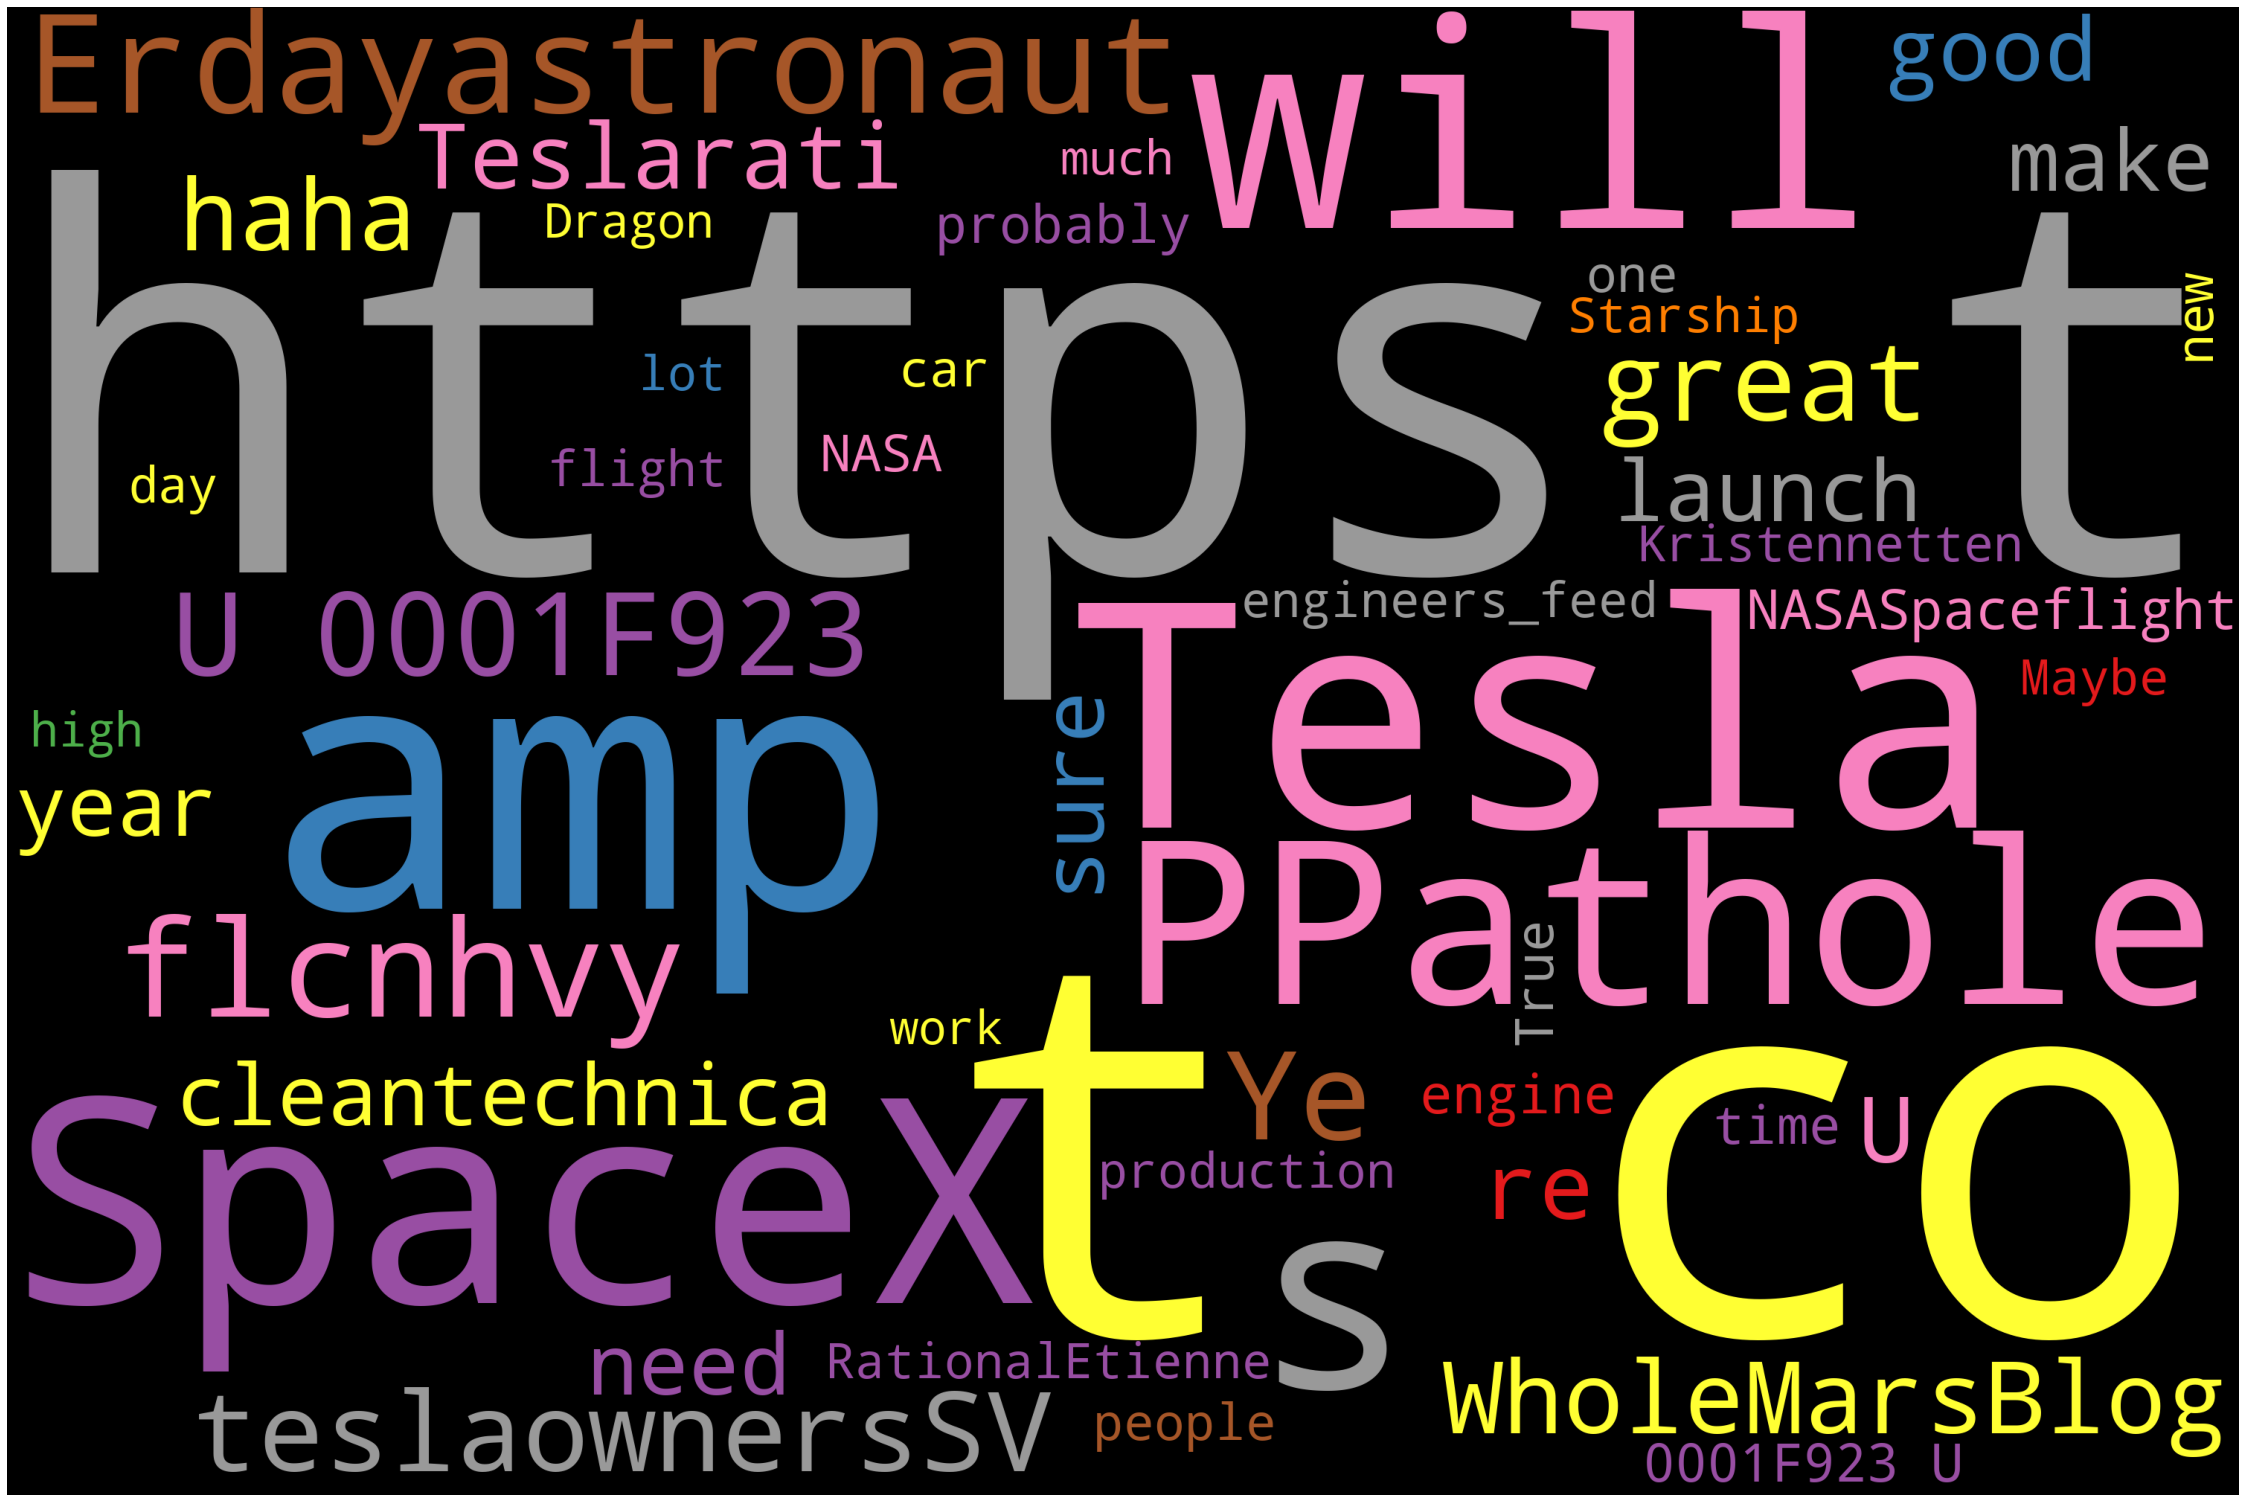

In [44]:
# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(tweet_text)
plot_cloud(wordcloud)

In [45]:
one_block=tweet_text
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [46]:
one_block

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [47]:
doc_block

@kunalb11 Im an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,
All thought he would fail,
Himself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine Its getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923

In [48]:
for token in doc_block:
    print(token, token.pos_)

@kunalb11 PROPN
Im VERB
an DET
alien ADJ
@ID_AA_Carmack NOUN
Ray PROPN
tracing VERB
on ADP
Cyberpunk PROPN
with ADP
HDR PROPN
is AUX
next ADJ
- PUNCT
level NOUN
. PUNCT
Have AUX
you PRON
tried VERB
it PRON
? PUNCT
@joerogan AUX
@Spotify VERB
Great ADJ
interview NOUN
! PUNCT
@gtera27 VERB
Doge PROPN
is AUX
underestimated VERB
@teslacn PROPN
Congratulations PROPN
Tesla PROPN
China PROPN
for ADP
amazing ADJ
execution NOUN
last ADJ
year NOUN
. PUNCT
Now ADV
on ADV
to ADP
the DET
next ADJ
for ADP
even ADV
more ADJ
! PUNCT
! PUNCT
Happy ADJ
New PROPN
Year PROPN
of ADP
the DET
Ox PROPN
! PUNCT
https://t.co/9WFKMYu2oj PROPN
Frodo PROPN
was AUX
the DET
underdoge ADJ
, PUNCT

 SPACE
All PRON
thought VERB
he PRON
would AUX
fail VERB
, PUNCT

 SPACE
Himself PRON
most ADJ
of ADP
all PRON
. PUNCT
https://t.co/zGxJFDzzrM PROPN
@OwenSparks VERB
_ PUNCT
@flcnhvy X
@anonyx10 PROPN
Haha PROPN
thanks NOUN
:) X
@flcnhvy PUNCT
@anonyx10 PROPN
Indeed PROPN
! PUNCT
Tweets NOUN
definitely ADV
do AUX
not PART


was AUX
instrumental ADJ
in ADP
developing VERB
early ADJ
vers NOUN
  SPACE
https://t.co/ULxTClM1g6 NOUN
@ErcXspace PROPN
@smvllstvrs PROPN
T PROPN
/ SYM
W PROPN
will AUX
be AUX
~1.5 VERB
, PUNCT
so SCONJ
it PRON
will AUX
accelerate VERB
unusually ADV
fast ADV
. PUNCT
High ADJ
T PROPN
/ SYM
W PROPN
is AUX
important ADJ
for ADP
reusable ADJ
v NOUN
  SPACE
https://t.co/u1z2CPRRQJ VERB
@we5dogg SPACE
@teslaownersSV VERB
No DET
escaping NOUN
that PRON
for ADP
me PRON
@TheBabylonBee ADV
Read VERB
the DET
whole ADJ
article NOUN
< X
U+0001F923><U+0001F923 NUM
> SYM
Warm PROPN
, PUNCT
sunny ADJ
day NOUN
& CCONJ
amp PROPN
; PUNCT
snowy ADJ
mountains NOUN
https://t.co/2k8psyqU4J NOUN
What PRON
a DET
beautiful ADJ
day NOUN
in ADP
LA PROPN
https://t.co/EsCJTbzO9D PROPN
@JayLav PUNCT
_ PUNCT
Yeah INTJ
, PUNCT
Dr PROPN
Frankensteen PROPN
https://t.co/WDJ9K2UJqK NOUN
@YounesH1989 INTJ
I PRON
never ADV
used VERB
this DET
guy NOUN
. PUNCT
He PRON
gave VERB
a DET
talk NOUN
at ADP
SpaceX NOUN
once ADV


pr AUX
  SPACE
https://t.co/9ybABEzxCV VERB
@p_ferragu NOUN
Looking VERB
into ADP
this PRON
. PUNCT
No DET
question NOUN
that SCONJ
FSD PROPN
should AUX
be AUX
viewed VERB
as ADP
reasonably ADV
valuable ADJ
when SCONJ
doing VERB
a DET
trade NOUN
- PUNCT
in NOUN
. PUNCT
@tobyliiiiiiiiii ADP
@Erdayastronaut PRON
For ADP
sure ADJ
@Erdayastronaut PROPN
Glad PROPN
youre NUM
ok INTJ
@Virgin_Orbit PROPN
Congratulations PROPN
! PUNCT
@teslaownersSV NOUN
This PRON
is AUX
a DET
good ADJ
one NUM
@MrBeastYT PROPN
I PRON
whistle VERB
@DMC_Ryan NOUN
@C_R_H_M PUNCT
@Tesla PROPN
Cybertruck PROPN
doesnt PROPN
need VERB
a DET
garage NOUN
@DMC_Ryan NOUN
@Tesla ADP
It PRON
will AUX
be AUX
awesome ADJ
@owenshift NOUN
Good ADJ
point NOUN
@signalapp PROPN
Your PRON
server NOUN
- PUNCT
side NOUN
code NOUN
is AUX
doing VERB
too ADV
much ADJ
@Wikipedia PROPN
Happy ADJ
birthday NOUN
Wikipedia PROPN
! PUNCT
So ADV
glad ADJ
you PRON
exist VERB
. PUNCT
@TheOnion NOUN
Guess VERB
you PRON
been AUX
watching VERB
Co

  SPACE
https://t.co/wmqWcT2WFH X
@Christo49699922 PROPN
@sean18743005 X
@Erdayastronaut DET
@SpaceX PROPN
That SCONJ
too ADV
@sean18743005 VERB
@Erdayastronaut DET
@SpaceX PROPN
Catapult PROPN
high ADV
into ADP
the DET
air NOUN
& CCONJ
amp PROPN
; PUNCT
land NOUN
on ADP
the DET
roof NOUN
with ADP
a DET
base NOUN
jumping NOUN
parachute NOUN
( PUNCT
the DET
only ADJ
way NOUN
to PART
travel VERB
) PUNCT
@Erdayastronaut ADV
@SpaceX PROPN
Thats PROPN
actually ADV
our PRON
restaurant NOUN
, PUNCT
but CCONJ
SpaceX PROPN
is AUX
building VERB
a DET
futuristic ADJ
bar NOUN
at ADP
the DET
top NOUN
of ADP
the DET
h NOUN
  SPACE
https://t.co/z2UmtGSAoI PROPN
@techreview PROPN
And CCONJ
increase VERB
fun NOUN
! PUNCT
Hopefully ADV
. PUNCT
@benmezrich PRON
Me PRON
neither CCONJ
@TonyChoMrMagic ADJ
@TeslaEnergy X
One NUM
of ADP
the DET
best ADJ
Tesla PROPN
Solar PROPN
Roof PROPN
installations VERB
@91demigod PROPN
No INTJ
, PUNCT
but CCONJ
maybe ADV
one NUM
day NOUN
@PPathole NOUN
@engineers_feed 

winder NOUN
- PUNCT
head NOUN
ostrich NOUN
came AUX
gliding VERB
through ADP
all DET
nonchalant ADJ
https://t.co/dtPMdM3TQp NOUN
@Tesmanian_com X
Seems VERB
odd ADJ
that SCONJ
the DET
opposition NOUN
group NOUN
is AUX
from ADP
BMWs PROPN
home NOUN
state NOUN
of ADP
Baveria PROPN
. PUNCT
Thats PROPN
very ADV
far ADV
from ADP
Brande PROPN
  SPACE
https://t.co/M7DYvli4cx PROPN
@Tesmanian_com PUNCT
This PRON
is AUX
very ADV
sensible ADJ
. PUNCT
Opposition NOUN
from ADP
anywhere ADV
can AUX
not PART
mean VERB
no DET
progress NOUN
everywhere ADV
! PUNCT
@harsimranbansal X
Literally ADV
@tobyliiiiiiiiii NUM
Are AUX
we PRON
sure ADJ
this PRON
is AUX
real ADJ
? PUNCT
Destiny NOUN
, PUNCT
destiny NOUN

 SPACE
No DET
escaping NOUN

 SPACE
that SCONJ
for ADP
me PRON
All DET
Tesla PROPN
cars NOUN
delivered VERB
in ADP
the DET
final ADJ
three NUM
days NOUN
of ADP
the DET
year NOUN
will AUX
get VERB
three NUM
months NOUN
of ADP
the DET
Full ADJ
Self NOUN
- PUNCT
Driving VERB
option NOUN
  SPACE
h

year NOUN
, PUNCT
your PRON
support NOUN
is AUX
super ADV
appreciated VERB
! PUNCT
! PUNCT
@DeepMind NOUN
@nature PROPN
Frictionless PROPN
AI PROPN
. PUNCT
What PRON
could AUX
possibly ADV
go VERB
wrong ADJ
? PUNCT
@heydave7 NOUN
Good ADJ
idea NOUN
@wintonARK NOUN
During ADP
the DET
darkest ADJ
days NOUN
of ADP
the DET
Model PROPN
3 NUM
program NOUN
, PUNCT
I PRON
reached VERB
out ADP
to ADP
Tim PROPN
Cook PROPN
to PART
discuss VERB
the DET
possibility NOUN
of ADP
  SPACE
https://t.co/opTz9UrNE0 PROPN
@wintonARK PROPN
Strange PROPN
, PUNCT
if SCONJ
true ADJ
. PUNCT


 SPACE
- PUNCT
Tesla PROPN
already ADV
uses VERB
iron NOUN
- PUNCT
phosphate NOUN
for ADP
medium ADJ
range NOUN
cars NOUN
made VERB
in ADP
our PRON
Shanghai PROPN
facto X
  SPACE
https://t.co/MIlWSilvRT PROPN
@archillect PROPN
Spartas PROPN
reply NOUN
to ADP
Macedon PROPN
@LizClaman PROPN
@Tesla PROPN
@FoxBusiness PROPN
@ClamanCountdown PROPN
Hi INTJ
Liz PROPN
! PUNCT
Thanks NOUN
to ADP
everyone PRON
who PRON
worked VER

theory NOUN
, PUNCT
it PRON
would AUX
us PRON
  SPACE
https://t.co/9SsChDKFAD PROPN
@ErcXspace NOUN
@SpaceX PROPN
Ship PROPN
leeward ADJ
side NOUN
will AUX
be AUX
bare ADJ
metal NOUN
, PUNCT
windward PROPN
will AUX
have VERB
black ADJ
, PUNCT
hexagonal ADJ
heat NOUN
shield NOUN
tiles NOUN
RT PROPN
@Pockn_CG PROPN
: PUNCT
Ca AUX
n't PART
wait VERB
! PUNCT
! PUNCT
@elonmusk PROPN
# SYM
spacex VERB
# NOUN
SpaceXStarship VERB
https://t.co/ynEtMywFvg NOUN
@conexionspacial PROPN
@Pockn_CG ADV
Yes INTJ
@SpacePadreIsle PROPN
@SpaceX PROPN
Agreed PROPN
, PUNCT
should AUX
be AUX
preserved VERB
in ADP
memory NOUN
of ADP
SN8 PROPN
RT PROPN
@SpaceX PROPN
: PUNCT
Photos NOUN
from ADP
Starship NOUN
SN8s NOUN
flight NOUN
test NOUN
< X
U+2192 X
> X
https://t.co/095WHX44BX NOUN
https://t.co/5OzLYF7QRf PROPN
@NASASpaceflight NOUN
@BocaChicaGal PUNCT
Exactly ADV
! PUNCT
Woohoo PROPN
! PUNCT
! PUNCT
@Erdayastronaut PROPN
@SpaceX PROPN
SN8 PROPN
did VERB
great ADJ
! PUNCT
Even ADV
reaching VERB
apogee NOU

@PPathole NOUN
@karpathy PROPN
For ADP
a DET
second ADJ
there ADV
, PUNCT
I PRON
thought VERB
that PRON
was AUX
a DET
pic NOUN
of ADP
Thanos PROPN
haha VERB
@Poppa_BearQ ADP
@ID_AA_Carmack INTJ
Yeah PROPN
, PUNCT
truncate NOUN
zeros NOUN
& CCONJ
amp PROPN
; PUNCT
then ADV
round VERB
@dburkland PROPN
@ID_AA_Carmack ADV
Probably ADV
going VERB
to ADP
a DET
wider ADJ
beta NOUN
in ADP
~2 NOUN
weeks NOUN
@ID_AA_Carmack ADV
fp16 PROPN
with SCONJ
least ADJ
important ADJ
digits NOUN
truncated VERB
( PUNCT
so ADV
it PRON
feels VERB
like ADP
fp32 PROPN
) PUNCT
is AUX
what PRON
were PRON
betting VERB
on ADP
for ADP
training NOUN
with ADP
Dojo PROPN
@ID_AA_Carmack NOUN
Int8 NOUN
for ADP
almost ADV
all PRON
heavy ADJ
lifting NOUN
in ADP
inference NOUN
works VERB
great ADJ
@thisisjendoll PROPN
But CCONJ
actually ADV
! PUNCT
https://t.co/lb14pKsayI X
@thisisjendoll PROPN
https://t.co/mMg5b8b40z PROPN
Happy PROPN
Thanksgiving PROPN
! PUNCT
@teslaownerssv PROPN
@JohnEG78 PUNCT
@TeslaChillMode ADP
@UNP

https://t.co/64ocngk3ey PROPN
@spacetouristuk PROPN
@TashaARK PROPN
Yeah INTJ
. PUNCT
They PRON
stole VERB
Apples PROPN
code NOUN
too ADV
. PUNCT

 SPACE
https://t.co/gy4DT7Pq9N PROPN
@TashaARK PROPN
They PRON
have VERB
an DET
old ADJ
version NOUN
of ADP
our PRON
software NOUN
& CCONJ
amp PROPN
; PUNCT
dont PROPN
have VERB
our PRON
NN PROPN
inference NOUN
computer NOUN
@levie PROPN
Wild ADJ
times NOUN
! PUNCT
@RocketLab X
Congrats NOUN
! PUNCT
@slashdot X
.@TheOnion PUNCT
@ID_AA_Carmack ADV
Yup INTJ
@flcnhvy PROPN
Change VERB
out ADP
a DET
few ADJ
parts NOUN
, PUNCT
otherwise ADV
fine ADJ
@Forbes NOUN
Caution PROPN
strongly ADV
advised VERB
with ADP
SPACs PROPN
@AdamKIotz VERB
@Suvitruf ADJ
@archillect PROPN
Sure INTJ
@Suvitruf ADJ
@archillect PROPN
Haha PROPN
sexy VERB
cropping NOUN
champion NOUN
of ADP
all DET
time NOUN
@tweetmenima PROPN
@teslaownerssv X
If SCONJ
next ADV
weeks PRON
release NOUN
looks VERB
good ADJ
, PUNCT
we PRON
will AUX
widen VERB
beta ADJ
@justpaulinelol PROP

@jack PROPN
Well INTJ
said VERB
. PUNCT
@trylolli PROPN
@Maisie_Williams NOUN
< X
U+0001F47B X
> X
< X
U+0001F4B5 X
> X

 SPACE
https://t.co/UWerAhxUev PROPN
@Erdayastronaut PRON
@rweb11742 ADJ
Damn PROPN
, PUNCT
thats PROPN
not PART
easy ADJ
! PUNCT
I PRON
spent VERB
quite DET
a DET
bit NOUN
of ADP
time NOUN
looking VERB
at ADP
Russian ADJ
/ SYM
Ukrainian ADJ
engines NOUN
. PUNCT
Theyre PROPN
good NOUN
. PUNCT
@PPathole PROPN
@michaelmina_lab PROPN
Yes INTJ
RT PROPN
@SpaceX PROPN
: PUNCT
Docking PROPN
confirmed VERB
 PROPN
Crew PROPN
Dragon PROPN
has AUX
arrived VERB
at ADP
the DET
@space_station NUM
! PUNCT
@Maisie_Williams NOUN
< X
U+0001F3B6 X
> X
Toss VERB
a DET
bitcoin NOUN
to PART
ur VERB
Witcher PROPN
< X
U+0001F3B6 PROPN
> X
@Kristennetten PROPN
< X
U+0001F609 SPACE
> X
RT PROPN
@NASA PROPN
: PUNCT
< X
U+0001F409 SPACE
> X
Enter VERB
the DET
Crew PROPN
Dragon PROPN
. PUNCT
At ADP
4:48 NUM
p.m. NOUN
EST PROPN
( PUNCT
9:48 NUM
p.m. NOUN
UTC PROPN
) PUNCT
, PUNCT
the DET
NASA 

win VERB

 SPACE
2 X
. PUNCT
You PRON
cant PROPN
break VERB
even ADV

 SPACE
3 X
. PUNCT
You PRON
cant PROPN
stop VERB
playing VERB
Shakes PROPN
fist NOUN
at ADP
entropy PRON
@RealNattastic ADJ
Big ADJ
expansion NOUN
of ADP
beta ADJ
program NOUN
in ADP
6 NUM
to PART
8 NUM
weeks NOUN
! PUNCT
@robintosh_nunez NOUN
@PPathole X
Interesting ADJ
. PUNCT
My PRON
Thursday PROPN
night NOUN
saliva NOUN
sample NOUN
came VERB
back ADV
today NOUN
with ADP
N1 NOUN
gene NOUN
( PUNCT
unique ADJ
to ADP
cov NOUN
  SPACE
https://t.co/Tm7cs8oTdT PROPN
@ICannot_Enough X
@JohnnaCrider1 NUM
Whats PROPN
honey PROPN
? PUNCT
@slashdot X
Feels VERB
that DET
way NOUN
@WhatsupFranks VERB
@bluemoondance74 VERB
@StephenKing VERB
This PRON
seems VERB
accurate ADJ
@bluemoondance74 NOUN
@StephenKing ADJ
Cold ADJ
symptoms NOUN
are AUX
gone VERB
for ADP
now ADV
< X
U+0001F600><U+0001F680><U+0001F4AB X
> X
@StephenKing VERB
There PRON
are VERB
degrees NOUN
of ADP
pos NOUN
@MrSammy_H ADP
@pelagicbird PROPN
@max_roi PRO

@SpacexVision NOUN
@FelixSchlang PROPN
Probably ADV
@TeslaNY ADJ
@Tesla PROPN
Happy PROPN
to PART
see VERB
this PRON
:) PUNCT
@SamTalksTesla PROPN
@Tesla PROPN
I PRON
do AUX
expect VERB
this PRON
to PART
become VERB
an DET
important ADJ
product NOUN
for ADP
the DET
world NOUN
, PUNCT
but CCONJ
probably ADV
not PART
financially ADV
material NOUN
for ADP
Tesla PROPN
@nickhenning3d PROPN
@SpaceX PROPN
@ErcXspace PROPN
@Neopork85 VERB
@C_Bass3d PROPN
@Caspar_Stanley NOUN
@SpacexVision NOUN
@FelixSchlang PROPN
Theres INTJ
no DET
entry NOUN
  SPACE
https://t.co/NCafKnfZlc PROPN
@SamTalksTesla PROPN
@Tesla PROPN
Tesla PROPN
makes VERB
the DET
RNA PROPN
Bioreactor PROPN
that PRON
can AUX
make VERB
vaccines NOUN
/ SYM
cures NOUN
. PUNCT
CureVac PROPN
has VERB
version NOUN
2 NUM
in ADP
use NOUN
. PUNCT
  SPACE
https://t.co/OPouohyAmu PUNCT
RT PROPN
@SpaceX PROPN
: PUNCT
Crew PROPN
Dragon PROPN
and CCONJ
Falcon PROPN
9 NUM
in ADP
the DET
hangar NOUN
at ADP
Launch PROPN
Complex PROPN
39A NUM
ah

  SPACE
https://t.co/8ZBt9qJD9H X
@jason_rassett X
Lower ADJ
latitude NOUN
states NOUN
need VERB
more ADJ
satellites NOUN
in ADP
position NOUN
, PUNCT
so ADV
probably ADV
January PROPN
Several ADJ
thousand NUM
more ADJ
Starlink NOUN
beta ADJ
participation NOUN
invitations NOUN
going VERB
out ADP
this DET
week NOUN
@LouisWFerreira PROPN
New PROPN
design NOUN
is AUX
better ADJ
with ADP
many ADJ
minor ADJ
tweaks NOUN
. PUNCT
Even ADV
the DET
small ADJ
details NOUN
matter ADV
. PUNCT
@engineers_feed X
Haha PROPN
Very ADV
close ADV
to ADP
actual ADJ
expected VERB
flight NOUN
! PUNCT
https://t.co/ruEdIPhTil ADV
@Nigel_Lockyer NOUN
I PRON
could AUX
not PART
be AUX
more ADV
excited ADJ
about ADP
the DET
new ADJ
supercollider NOUN
! PUNCT
That PRON
said VERB
, PUNCT
while SCONJ
it PRON
is AUX
considerably ADV
larger ADJ
, PUNCT
  SPACE
https://t.co/s3typirk4U AUX
@WholeMarsBlog VERB
@steezyysosa PROPN
@AustinTeslaClub PROPN
@JoeTegtmeyer PROPN
@peterdog15 PROPN
@TXTerafactory PROPN
@Terafacto

@bart_sanders VERB
Working VERB
on ADP
it PRON
. PUNCT
Also ADV
needs VERB
to PART
be AUX
able ADJ
fart NOUN
at ADP
other ADJ
cars NOUN
on ADP
command NOUN
. PUNCT
@SpacePadreIsle PROPN
Starship PROPN
is AUX
coming VERB
together ADV
! PUNCT
Price NOUN
change NOUN
is AUX
pushed VERB
to ADP
Thursday PROPN
next ADJ
week NOUN
. PUNCT
Applies VERB
only ADV
to ADP
US PROPN
for ADP
now ADV
. PUNCT
One NUM
week NOUN
clock NOUN
will AUX
start VERB
in ADP
other ADJ
countr NOUN
  SPACE
https://t.co/cjhTxCseLt PROPN
@austinbarnard45 VERB
There PRON
will AUX
be AUX
a DET
360 NUM
deg NOUN
glass NOUN
Star PROPN
Bar PROPN
( PUNCT
name NOUN
tbd PROPN
) PUNCT
at ADP
top NOUN
of ADP
high ADJ
bay NOUN
@DMC_Ryan NOUN
Well INTJ
, PUNCT
we PRON
have AUX
said VERB
many ADJ
times NOUN
that SCONJ
the DET
price NOUN
will AUX
rise VERB
as SCONJ
the DET
product NOUN
functionality NOUN
improves VERB
. PUNCT
How SCONJ
much ADJ
ti AUX
  SPACE
https://t.co/xMeMO5Nu0 PROPN
M PROPN
@StephenKing PROPN
Agreed PROPN
. PU

@ChotiHaque ADJ
@BillGates NOUN
@DougStanhope VERB
@bobdylan PROPN
@charltonbrooker PROPN
@EricIdle PROPN
@JimCarrey PROPN
@JohnCleese PUNCT
@sapinker PROPN
Knee PROPN
deep ADJ
RT PROPN
@SpaceX PROPN
: PUNCT
This PRON
will AUX
be AUX
the DET
first ADJ
flight NOUN
of ADP
the DET
upgraded VERB
cargo NOUN
version NOUN
of ADP
Dragon PROPN
, PUNCT
which PRON
is AUX
able ADJ
to PART
carry VERB
50 NUM
% NOUN
more ADJ
science NOUN
payloads NOUN
than ADP
th DET
RT PROPN
@SpaceX NOUN
: PUNCT
The DET
Dragon PROPN
spacecraft NOUN
supporting VERB
SpaceXs ADJ
21st PROPN
cargo NOUN
resupply NOUN
mission NOUN
to ADP
the DET
@space_station NUM
departed VERB
our PRON
Hawthorne NOUN
factory NOUN
last ADJ
@chipro PROPN
Yeah INTJ
@WR4NYGov VERB
At ADP
least ADJ
success NOUN
is AUX
in ADP
the DET
set NOUN
of ADP
all DET
possible ADJ
outcomes NOUN
this DET
time NOUN
! PUNCT
@bad_at_life NOUN
@WholeMarsBlog NOUN
Diess PROPN
is AUX
doing VERB
his PRON
best ADJ
to PART
move VERB
in ADP
the DET
right ADJ
direct

a DET
highly ADV
specialized ADJ
solution NOUN
. PUNCT
The DET
Tesla PROPN
approach NOUN
is AUX
a DET
general ADJ
solution NOUN
. PUNCT
The DET
lat NOUN
  SPACE
https://t.co/BbchdqHjjA PROPN
@akidesir PROPN
@Kristennetten INTJ
Yeah INTJ
, PUNCT
we PRON
could AUX
put VERB
in ADP
a DET
setting NOUN
allowing VERB
it PRON
to PART
drop VERB
as ADV
low ADJ
as ADP
5 NUM
% NOUN
@ErcXspace NOUN
@SpaceX NOUN
@Erdayastronaut PROPN
@MarcusHouseGame PROPN
@FelixSchlang PROPN
Great PROPN
render NOUN
. PUNCT
Note VERB
, PUNCT
there PRON
will AUX
need VERB
to PART
be AUX
an DET
arm NOUN
  SPACE
https://t.co/9g2N7FvSCZ PROPN
@Kristennetten PROPN
Mimecraft PROPN
@TeslaGong PROPN
@TeslaTested VERB
Yes INTJ
@ICannot_Enough DET
@TeslaTested VERB
Autopilot PROPN
team NOUN
is AUX
making VERB
great ADJ
progress NOUN
. PUNCT
Reality NOUN
sure ADV
is AUX
complicated ADJ
! PUNCT
@ErcXspace NOUN
@MarcusHouseGame PROPN
@brendan2908 NOUN
@BocaChicaGal ADP
@NASASpaceflight NOUN
Aspiring PROPN
to PART
have VERB
no 

to PART
subsidize VERB
pollution NOUN
! PUNCT
This PRON
is AUX
not PART
good ADJ
for ADP
people NOUN
, PUNCT
especially ADV
in ADP
dense ADJ
cities NOUN
with ADP
heavy ADJ
  SPACE
https://t.co/ACKoIzWcPW PROPN
@SciGuySpace X
Its PROPN
a DET
step NOUN
in ADP
the DET
right ADJ
direction NOUN
, PUNCT
but CCONJ
they PRON
should AUX
really ADV
aim VERB
for ADP
full ADJ
reusability NOUN
by ADP
2026 NUM
. PUNCT
Larger ADJ
ro VERB
  SPACE
https://t.co/6hVvKUQdON NOUN
Turn VERB
volume NOUN
to ADP
11 NUM
& CCONJ
amp PROPN
; PUNCT
play VERB
Powerglide ADV
in ADP
your PRON
Tesla PROPN


 SPACE
https://t.co/l07Yc02P7 VERB
g PROPN
@teslaownersSV PROPN
FSD PROPN
will AUX
solve VERB
these DET
issues NOUN
Music NOUN
volume NOUN
on ADP
a DET
Tesla PROPN
goes VERB
to ADP
11 NUM
, PUNCT
because SCONJ
its PROPN
louder ADV
than ADP
10 NUM


 SPACE
https://t.co/ab5hAMo3EN PROPN
@Kristennetten ADJ
@flcnhvy PROPN
One NUM
of ADP
my PRON
favorite ADJ
writers NOUN
. PUNCT
Foundation PROPN
is AUX
tough ADJ
to 

IPO PROPN
Starlink PROPN
, PUNCT
but CCONJ
only ADV
several ADJ
years NOUN
in ADP
the DET
future NOUN
when SCONJ
revenue NOUN
growth NOUN
is AUX
  SPACE
https://t.co/kH4QryrKOe PROPN
@PerezShivam PROPN
@waEMD NOUN
@SpaceX PROPN
Fate PROPN
loooves VERB
irony NOUN
haha PROPN
@waEMD X
@SpaceX PROPN
Glad PROPN
SpaceX PROPN
could AUX
help VERB
! PUNCT
We PRON
are AUX
prioritizing VERB
emergency NOUN
responders NOUN
& CCONJ
amp PROPN
; PUNCT
locations NOUN
with ADP
no DET
Internet NOUN
connectivity NOUN
at ADV
all ADV
. PUNCT
@austinbarnard45 VERB
True ADJ
@teslavibes NOUN
Thats ADJ
total ADJ
market NOUN
, PUNCT
not PART
all PRON
Tesla PROPN
. PUNCT
We PRON
do AUX
see VERB
Tesla PROPN
reaching VERB
20 NUM
M NUM
vehicles NOUN
/ SYM
year NOUN
probably ADV
before ADP
2030 NUM
, PUNCT
bu PROPN
  SPACE
https://t.co/GXnszaCAR3 PROPN
@CashMoneyLemon PROPN
@CathieDWood PROPN
@skorusARK ADP
Total ADJ
market NOUN
@CathieDWood NOUN
@skorusARK PROPN
Seven NUM
years NOUN
for ADP
sure ADJ
to ADP
30M+ N

we PRON
should AUX
wait VERB
until SCONJ
FSD PROPN
is AUX
a DET
bit NOUN
more ADV
mature ADJ
@singing__surfer NOUN
Im VERB
pretty ADV
sure ADV
Tesla PROPN
could AUX
do VERB
a DET
much ADV
better ADJ
autocorrect NOUN
. PUNCT
The DET
bar NOUN
is AUX
so ADV
low ADJ
haha ADJ
. PUNCT
@LorenzoTeixeir4 PUNCT
@Zog_Fot_Pik NUM
@samiralyateem VERB
@ID_AA_Carmack ADV
True ADJ
@IgorAntarov NOUN
@soumiksf NOUN
@ID_AA_Carmack ADJ
Custom PROPN
ultra ADJ
high ADJ
speed NOUN
bus NOUN
& CCONJ
amp PROPN
; PUNCT
efficient ADJ
cooling VERB
@teslaownersSV NOUN
@jgrano305 NOUN
@soumiksf PROPN
@ID_AA_Carmack ADV
Ok ADJ
@flcnhvy NOUN
@soumiksf NOUN
@ID_AA_Carmack NOUN
Pretty ADV
much ADV
any DET
machine NOUN
- PUNCT
learning VERB
@jgrano305 NOUN
@soumiksf PROPN
@ID_AA_Carmack ADJ
Its PROPN
big ADJ
@Zog_Fot_Pik PROPN
@samiralyateem VERB
@ID_AA_Carmack ADV
Sure INTJ
@soumiksf NOUN
@ID_AA_Carmack NOUN
Yeah INTJ
, PUNCT
we PRON
will AUX
open VERB
Dojo PROPN
for ADP
training NOUN
as ADP
a DET
web NOUN
service NOU

or CCONJ
another PRON
, PUNCT
excitement NOUN
guaranteed VERB
! PUNCT
Support NOUN
of ADP
greater ADJ
Boca PROPN
, PUNCT
Padre PROPN
, PUNCT
Brownsville PROPN
community NOUN
is AUX
very ADV
much ADV
appreciated VERB
. PUNCT
SN8 PROPN
Starship PROPN
with ADP
flaps NOUN
& CCONJ
amp NOUN
; PUNCT
nosecone PROPN
should AUX
be AUX
done VERB
in ADP
about ADV
a PRON
week NOUN
. PUNCT
Then ADV
static ADJ
fire NOUN
, PUNCT
checkouts NOUN
, PUNCT
static ADJ
fire NOUN
, PUNCT
fly VERB
to ADP
60,000 NUM
ft PROPN
& CCONJ
amp PROPN
; PUNCT
back ADV
. PUNCT
@SpacePadreIsle ADJ
@BocaChicaGal PROPN
@NASASpaceflight NOUN
Can AUX
someone PRON
do VERB
a DET
boat NOUN
service NOUN
from ADP
South PROPN
Padre PROPN
to ADP
Boca PROPN
? PUNCT
@WhatsupFranks AUX
@samiralyateem VERB
@WholeMarsBlog VERB
Exactly ADV
. PUNCT
Problems NOUN
like ADP
that PRON
have AUX
been AUX
addressed VERB
. PUNCT
@PPathole PROPN
@WholeMarsBlog NOUN
Yes INTJ
. PUNCT
Good ADJ
insight NOUN
. PUNCT
@samiralyateem PROPN
@WholeMarsBlog N

If SCONJ
you PRON
ever ADV
want VERB
to PART
build VERB
a DET
long ADJ
accelerator NOUN
tunnel NOUN
, PUNCT
straight ADJ
or CCONJ
circular ADJ
, PUNCT
I PRON
know VERB
some DET
people NOUN
RT PROPN
@SpaceX PROPN
: PUNCT
After SCONJ
launching VERB
SAOCOM PROPN
1B NOUN
and CCONJ
two NUM
rideshare ADJ
payloads NOUN
to PART
orbit VERB
, PUNCT
Falcon PROPN
9s NUM
first ADJ
stage NOUN
returns NOUN
to ADP
Earth PROPN
and CCONJ
lands NOUN
at ADP
Landing PROPN
Zon PROPN
RT PROPN
@SpaceX PROPN
: PUNCT
Deployment NOUN
of ADP
SAOCOM PROPN
1B PROPN
confirmed VERB
https://t.co/gqtxQMpy48 X
RT PROPN
@SpaceX PROPN
: PUNCT
Falcon PROPN
9s NUM
first ADJ
stage NOUN
has AUX
landed VERB
at ADP
Landing PROPN
Zone PROPN
1 NUM
https://t.co/0y5FkVqPk8 PROPN
RT PROPN
@SpaceX PROPN
: PUNCT
Liftoff NOUN
! PUNCT
https://t.co/AIwrMzB3D1 NOUN
@VitalVegas NOUN
Cool PROPN
RT PROPN
@neuralink PROPN
: PUNCT
Snout PROPN
Boops NOUN
https://t.co/ZJogq2ulvf ADP
@Nigel_Lockyer PROPN
@Penn PROPN
@Fermilab PROPN
Physics PROP

. PUNCT
Those PRON
are AUX
folded VERB
- PUNCT
over ADP
c NOUN
  SPACE
https://t.co/aLExCZiJ1l PROPN
@cleantechnica PROPN
But CCONJ
actually ADV
nothing PRON
. PUNCT
Was AUX
surprised ADJ
to PART
hear VERB
theyre NOUN
across ADP
the DET
road NOUN
. PUNCT
Adding VERB
silicon NOUN
to ADP
carbon PROPN
anode NOUN
  SPACE
https://t.co/oohNzZEh9v NOUN
@cleantechnica PROPN
Nothing PRON
< X
U+0001F440 X
> X
@lexfridman PROPN
Then ADV
they PRON
leave VERB
the DET
house NOUN
and CCONJ
hardly ADV
ever ADV
call VERB
their PRON
parents NOUN
! PUNCT
The DET
Big PROPN
Bang PROPN
started VERB
very ADV
, PUNCT
very ADV
smol PROPN
https://t.co/XVvcuALZ2o NOUN
https://t.co/8R92iEXVvN PROPN
@PPathole PROPN
Asimov PROPN
was AUX
< X
U+0001F525><U+0001F525 NUM
> X
Should AUX
we PRON
believe VERB
things NOUN
proportionate VERB
to ADP
the DET
evidence NOUN
that SCONJ
they PRON
are AUX
true ADJ
? PUNCT
( PUNCT
yes INTJ
) PUNCT
Olde PROPN
skoole NOUN
analog NOUN
synthesizer NOUN
from ADP
ancient ADJ
Britain P

> X
@Erdayastronaut DET
@nextspaceflight X
I PRON
dont PROPN
want VERB
be AUX
cavalier ADJ
, PUNCT
but CCONJ
there PRON
isnt VERB
an DET
obvious ADJ
limit NOUN
. PUNCT
100 NUM
+ NUM
flights NOUN
are AUX
possi NOUN
  SPACE
https://t.co/3dHapZhixH NOUN
@cnunezimages NOUN
@SpaceIntellige3 ADV
Ive ADP
been AUX
working VERB
in ADP
Boca PROPN
since SCONJ
Sunday PROPN
. PUNCT
August PROPN
heat NOUN
& CCONJ
amp PROPN
; PUNCT
humidity NOUN
in ADP
South PROPN
Texas PROPN
is AUX
int NOUN
  SPACE
https://t.co/xEPds9ItUW NOUN
@ajtourville PROPN
@comma_ai NOUN
@Tesmanian_com X
Dojo PROPN
V1.0 PROPN
isnt PROPN
done VERB
yet ADV
. PUNCT
About ADV
a DET
year NOUN
away ADV
. PUNCT
Not PART
just ADV
about ADP
the DET
chips NOUN
. PUNCT
Power NOUN
  SPACE
https://t.co/tSbttIdUHJ NOUN
@spacecoast_stve VERB
Scorcher PROPN
VI PROPN
https://t.co/34O80p1hI6 NOUN
@antonioetayo PROPN
@Erdayastronaut ADP
@C_Bass3d PROPN
@NASASpaceflight NOUN
@FelixSchlang PROPN
Yes INTJ
Elevator NOUN
music NOUN
is AUX
unde

. PUNCT
Technically ADV
, PUNCT
we PRON
have VERB
it PRON
working VERB
in ADP
  SPACE
https://t.co/WzG16TAxEe NUM
@PPathole NOUN
@ICannot_Enough NOUN
@flcnhvy PUNCT
@Tesla PROPN
Dojo PROPN
is AUX
still ADV
being AUX
built VERB
. PUNCT
Maybe ADV
a DET
year NOUN
or CCONJ
so ADV
from ADP
V1.0 PROPN
. PUNCT
@ICannot_Enough X
@flcnhvy PUNCT
@Tesla PROPN
Autopilot PROPN
was AUX
trapped VERB
in ADP
a DET
local ADJ
maximum NOUN
, PUNCT
labeling VERB
single ADJ
camera NOUN
images NOUN
uncorrelate ADJ
  SPACE
https://t.co/W1gOo6ETzH NOUN
@ICannot_Enough ADP
@flcnhvy PUNCT
@Tesla VERB
Your PRON
insights NOUN
over ADP
the DET
years NOUN
have AUX
been AUX
excellent ADJ
. PUNCT
Thats INTJ
approximately ADV
right ADV
. PUNCT
@GiulioCoraggio NOUN
Absolutely ADV
, PUNCT
but CCONJ
it PRON
doesnt PROPN
seem VERB
that SCONJ
govt NOUN
can AUX
move VERB
fast ADV
enough ADJ
@teslaownersSV NOUN
Ok ADJ
@flcnhvy X
It PRON
will AUX
blow VERB
ur PROPN
mind NOUN
haha INTJ
https://t.co/LqnKEN5Kjn PROPN
Our PRON

; PUNCT
other ADJ
repairs NOUN
. PUNCT
Probably ADV
SN6 PROPN
flies VERB
before ADP
SN5 PROPN
. PUNCT
We PRON
need VERB
  SPACE
https://t.co/CGXSNck6uv PROPN
@lexfridman PROPN
Clearly PROPN
RT PROPN
@Erdayastronaut PROPN
: PUNCT
Spot VERB
the DET
tiny ADJ
humans NOUN
! PUNCT
! PUNCT
! PUNCT
This DET
shot NOUN
really ADV
puts VERB
it PRON
into ADP
scale NOUN
! PUNCT
! PUNCT
! PUNCT
A DET
full ADJ
blown VERB
Starship NOUN
and CCONJ
SuperHeavy PROPN
will AUX
be AUX
hard ADJ
to PART
fat VERB
@ramacvr PROPN
@Kristennetten ADJ
@PPathole PROPN
@BernieSanders NOUN
Also ADV
true ADJ
@Kristennetten ADJ
@PPathole PROPN
@BernieSanders NOUN
< X
U+0001F923><U+0001F923 NUM
> X
@PPathole NOUN
@BernieSanders NOUN
Over ADP
time NOUN
, PUNCT
since SCONJ
we PRON
give VERB
all DET
employees NOUN
shares NOUN
, PUNCT
my PRON
ownership NOUN
is AUX
diluted VERB
automatically ADV
. PUNCT
From ADP
  SPACE
https://t.co/AQgI0Cu2HN PROPN
RT PROPN
@ThePlanetaryGuy PROPN
: PUNCT
Videos NOUN
like ADP
this PRON
will 

stable ADJ
in ADP
the DET
water NOUN
Acquisition PROPN
of ADP
signal NOUN
expected VERB
in ADP
5 NUM
mins NOUN
4 NUM
mins NOUN
to ADP
Dragon PROPN
loss NOUN
of ADP
signal NOUN
due ADP
to ADP
atmospheric ADJ
entry NOUN
plasma NOUN
Dragon PROPN
will AUX
travel VERB
from ADP
south NOUN
of ADP
New PROPN
Zealand PROPN
to ADP
Florida PROPN
in ADP
~37 DET
minutes NOUN
Coming VERB
in ADP
hot ADJ
https://t.co/dzFr5BNBfF NOUN
Astronauts PROPN
land NOUN
in ADP
2 NUM
hours NOUN
@NASA PROPN
@SpaceX ADJ
RT PROPN
@SpaceX PROPN
: PUNCT
Crew PROPN
Dragons PROPN
flight NOUN
back ADV
to ADP
Earth PROPN
with ADP
@AstroBehnken PROPN
and CCONJ
@Astro_Doug NOUN
remains VERB
on ADP
track NOUN
; PUNCT
targeting VERB
splashdown NOUN
off ADP
the DET
coast NOUN
of ADP
P PROPN
@Erdayastronaut ADV
@SpaceX PUNCT
However ADV
, PUNCT
we PRON
did AUX
prove VERB
that SCONJ
a DET
SuperDraco PROPN
landing NOUN
could AUX
work VERB
by ADP
doing VERB
a DET
propulsive ADJ
hover NOUN
https://t.co/Mr7VFIQwWf ADJ
@Erdayastronau

@rodamn PROPN
Its PROPN
a DET
prototype NOUN
of ADP
the DET
color NOUN
@schristakos PROPN
@BernieSanders NOUN
And CCONJ
to PART
think VERB
I PRON
used VERB
to PART
like VERB
Bernie PROPN
! PUNCT
< X
U+0001F622 SPACE
> X
https://t.co/adojS2UCe3 ADJ
@vistacruiser7 NOUN
@schristakos PROPN
@BernieSanders NOUN
@BernieSanders NOUN
< X
U+0001F54A><U+0001F54A X
> X
@schristakos ADJ
@BernieSanders NOUN
Maybe ADV
hes VERB
feeling VERB
the DET
bern ADJ
haha NOUN
@NASASpaceflight NOUN
Fuel PROPN
spin NOUN
valve VERB
didnt ADJ
open ADJ
. PUNCT
Will AUX
fix VERB
& CCONJ
amp PROPN
; PUNCT
try VERB
again ADV
tomorrow NOUN
. PUNCT
Also ADV
, PUNCT
some DET
odd ADJ
TVC PROPN
hydraulic NOUN
pump NOUN
behavior NOUN
. PUNCT
@NASASpaceflight NOUN
I PRON
was AUX
just ADV
out ADV
at ADP
the DET
launch NOUN
pad NOUN
. PUNCT
Connector PROPN
damaged VERB
in ADP
the DET
storm NOUN
, PUNCT
but CCONJ
fixed VERB
now ADV
. PUNCT
Might AUX
be AUX
able ADJ
to PART
  SPACE
https://t.co/FB7e5nOq2E VERB
@PrisonPlanet 

better ADJ
than ADP
H2 PROPN
. PUNCT
Soviet PROPN
CH4 PROPN
  SPACE
https://t.co/aLeWbZ8Nfl NOUN
@waitbutwhy PROPN
Basically ADV
, PUNCT
our PRON
pixel ADJ
size NOUN
@LudaLisl PROPN
@Tesla PROPN
Cant PROPN
emphasize VERB
this PRON
enough ADJ
@tomosman NOUN
@Tesla PROPN
Absolutely ADV
@ajtourville PROPN
Haha PROPN
@cleantechnica PROPN
Agreed PROPN
@internetofshit PROPN
My PRON
oven ADJ
keeps VERB
asking VERB
for ADP
my PRON
wifi NOUN
password NOUN
. PUNCT
Its PROPN
not PART
gon VERB
na PART
get VERB
it PRON
. PUNCT
Impressive ADJ
Tianwen-1 NOUN
Mars PROPN
rover NOUN
mission NOUN
launched VERB
by ADP
China PROPN
today NOUN
https://t.co/FsyA3I0HrU X
RT PROPN
@Tesla PROPN
: PUNCT
https://t.co/jmkacbRb5D NOUN
@BBC_Future ADP
Good ADJ
article NOUN
@BBCScienceNews PUNCT
Similar ADJ
problem NOUN
with ADP
US PROPN
data NOUN
@OMGROFLOLJK PROPN
Good ADJ
point NOUN
You PRON
dont PROPN
have VERB
a DET
soul NOUN
, PUNCT
you PRON
are AUX
a DET
soul NOUN
@cleantechnica PROPN
Adding VERB
people NOU

! PUNCT
? PUNCT
@flcnhvy PUNCT
Yes INTJ
@PPathole NOUN
No DET
prior ADJ
neuroscience NOUN
background NOUN
is AUX
required VERB
. PUNCT
This PRON
is AUX
primarily ADV
an DET
electrical ADJ
/ SYM
electronic ADJ
( PUNCT
chip NOUN
design)/me NOUN
  SPACE
https://t.co/VMq2atdV5d PROPN
RT PROPN
@SpaceX PROPN
: PUNCT
Targeting PROPN
Monday PROPN
, PUNCT
July PROPN
20 NUM
for ADP
Falcon PROPN
9 NUM
launch NOUN
of ADP
ANASIS PROPN
- PUNCT
II PROPN
from ADP
SLC-40 PROPN
Solving PROPN
high ADJ
- PUNCT
volume NOUN
, PUNCT
high ADJ
- PUNCT
reliability NOUN
, PUNCT
low ADJ
- PUNCT
cost NOUN
production NOUN
problems NOUN
is AUX
especially ADV
valued VERB
If SCONJ
youve NOUN
solved VERB
hard ADJ
problems NOUN
with ADP
phones NOUN
/ SYM
wearables NOUN
( PUNCT
sealing NOUN
, PUNCT
signal NOUN
processing NOUN
, PUNCT
inductive ADJ
charging NOUN
, PUNCT
power NOUN
mgmt PROPN
, PUNCT
  SPACE
https://t.co/rq3AWMZxvo SPACE
@serhatserhatst PROPN
Many ADJ
@PPathole NOUN
Summarizes NOUN
pretty ADV
much ADV
e

@PPathole NOUN
@IheartTesla PROPN
Death PROPN
is AUX
the DET
loss NOUN
of ADP
information NOUN
@thatt3slaguy PUNCT
@flcnhvy PROPN
@PPathole NOUN
@IheartTesla PROPN
Earning VERB
power NOUN
post NOUN
augmentation NOUN
would AUX
easily ADV
pay VERB
for ADP
itself PRON
( PUNCT
if SCONJ
that PROPN
  SPACE
https://t.co/BpzWErSOyS PROPN
@flcnhvy PROPN
@PPathole NOUN
@IheartTesla PROPN
Absolutely ADV
@TeslaParaTodos SPACE
@EvaFoxU PUNCT
@Tesla PROPN
< X
U+0001F440 X
> X
@mjkapkan PROPN
@EvaFoxU ADP
@Tesla PROPN
Probably ADV
a DET
good ADJ
one NOUN
to PART
design NOUN
& CCONJ
amp PROPN
; PUNCT
engineer NOUN
in ADP
Germany PROPN
@blue_bnd NOUN
@EvaFoxU ADP
@Tesla PROPN
Even ADV
more ADJ
@Techgnostik NOUN
@EvaFoxU ADP
@Tesla PROPN
Ok ADJ
@scr00chy NOUN
@EvaFoxU ADP
@Tesla PROPN
< X
U+0001F440 X
> X
@EvaFoxU ADP
@Tesla PROPN
Berlin PROPN
Model PROPN
Y PROPN
is AUX
the DET
one NUM
to PART
watch VERB
. PUNCT
That PRON
is AUX
a DET
revolution NOUN
in ADP
automotive ADJ
body NOUN
engineering NOUN
( 

In [49]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['missing', 'work', 'go', 'seem', 'bit', 'appears', 'fixed', '#', 'coins', 'unit', 'time', 'https://t.co/4UH4rARC6', 'T', '_', 'launch', 'tower', 'stack', 'Raptors', 'orbit', 'booster', 'Improve', 'ship', 'booster', 'mass', '@michaelhodapp', 'work', 'tonight', 'video', 'https://t.co/UEEocOfcTb', 'people', 'spoken', '@Nivetha_7_42', 'cute', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'let', 'rainforests', 'come', 'crypto', 'simplicity', 'genius', '@AstroJordy', 'decades', 'work', 'Have', 'look', 'notes', 'emails', 'texts', 'Lessons', 'learned', 'tell', 'story', '@TheOnion', 'read', 'heard', 'name', 'years', 'https://t.co/cnOf9yjpF1', '@OwenSparks', 'thing', 'restaurants', 'get', 'hang', 'strangers', 'currency', 'scratch', 'said', 'ship', 'landing', 'burn', 'has', 'solution', 'greate', 'use', 'gas', 'maneuvering', 'thrusters', 'https://t.co/vsO9h4Ioed', '@SpaceX', 'seem', 'turbopump', 'have', 'mu', '@NASASpaceflight', 'launch', 'SPHEREx', 'mission', 'collect', 'data', '

In [50]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,co,204
1,https,202
2,ppathole,78
3,wholemarsblog,63
4,have,48
5,nasaspaceflight,46
6,launch,42
7,spacex,41
8,make,33
9,people,31


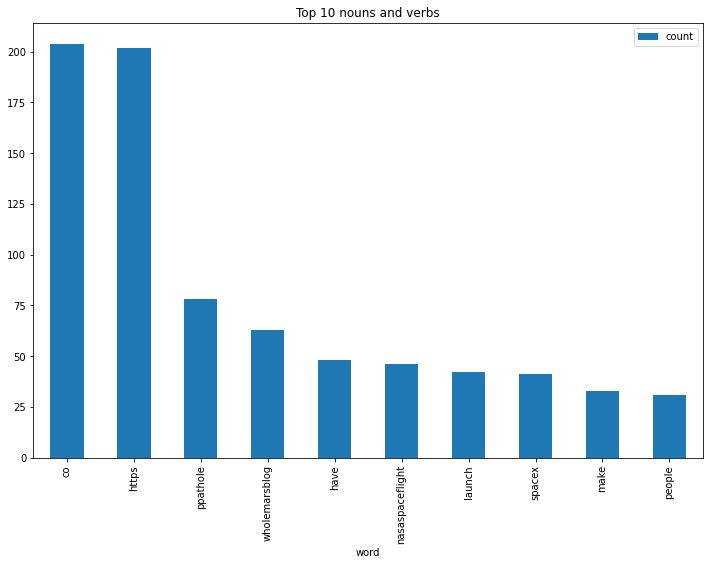

In [51]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

### Emotion Mining

In [52]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(tweet))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [53]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [58]:
# Emotion Lexicon - Affin
affin=pd.read_csv("D:\\Downloads\\Afinn.csv",encoding = 'latin1')
affin.head(20)

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
5,abductions,-2
6,abhor,-3
7,abhorred,-3
8,abhorrent,-3
9,abhors,-3


In [56]:
affin.shape

(2477, 2)

In [59]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [60]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [61]:
# manual testing
calculate_sentiment(text='great')

3

In [62]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
919    0
920   -4
921    0
922   -2
923    0
Name: sentiment_value, Length: 924, dtype: int64

In [63]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [64]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
64,"Also, the road to hell is mostly paved with ba...",-7,11
837,Cool Model 3 review by @iamjamiefoxx https://t...,-6,61
680,"Occasional flights from land are ok, but frequ...",-4,39
886,This is primarily an electrical/electronic (ch...,-4,69
...,...,...,...
645,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15,231
719,We just havent observed the https://t.co/mez...,15,72


In [65]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.00000
mean       1.37013
std        2.67799
min       -8.00000
25%        0.00000
50%        0.00000
75%        3.00000
max       16.00000
Name: sentiment_value, dtype: float64

In [66]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-4,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [67]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The most entertaining outcome is the most like...,3,109
17,Back to work I go @CapybaraSurfer @MattWallace...,4,38
...,...,...,...
911,He was one of the very best.,3,7
913,"@Ali_Afshari In general, we need to improve ho...",4,87
915,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",3,15
917,This is both great &amp; terrifying.,3,6


In [68]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11,919
920,"It may never pay out, as the stock cant b ht...",-4,31,920
921,Details Aug 28.,0,3,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47,922


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

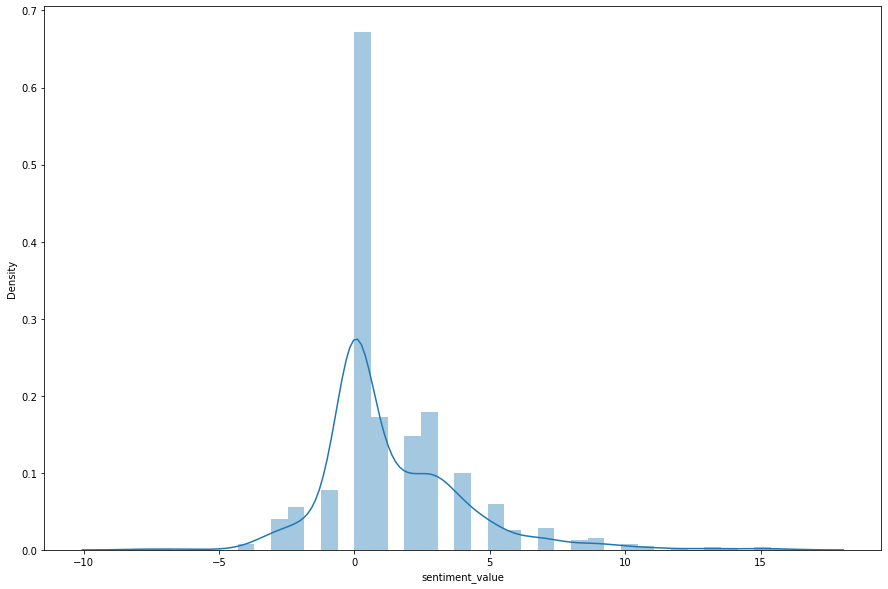

In [69]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

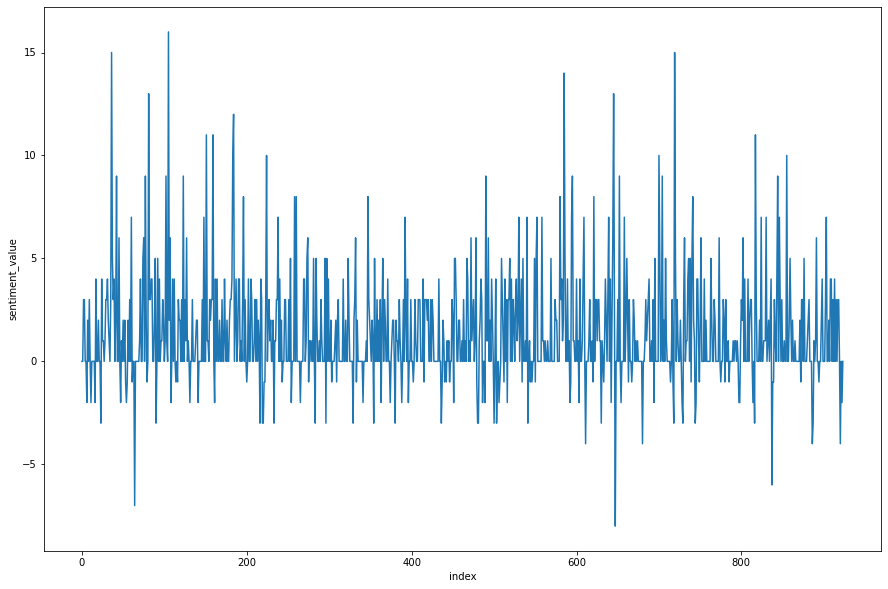

In [70]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

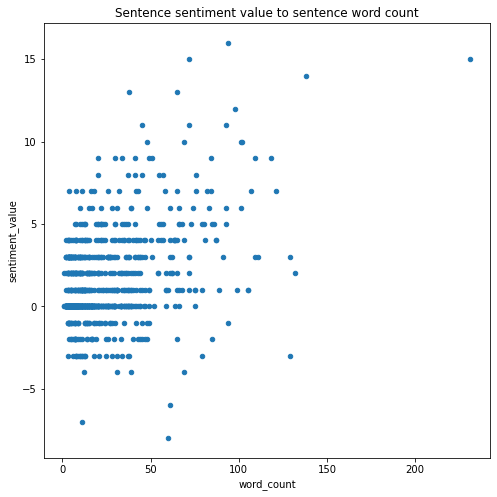

In [71]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')